# Pneumonia X-ray case, image recognition using CNN.

# Overview
With the increasing number of pneumonia cases during COVID hospitals are overwhelmed with additional work. Some of the methods that are used to diagnosed COVID is by making X rays of chrest. I was hired by a local hospital to create a model that can automatically classify person on having or not pneumonia based on X-ray. This system should have high accuracy and high recall.

To acheive my goal, I used different DeepLearn techniques including CNN and pretrained CNN. 


# Business Understanding
Our stakeholder wants to have model that can be reliable in predicting when person have pneumonia.

# Data

1) Chest X-Ray Images. Year: 2018 
Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018), “Large Dataset of Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images”, Mendeley Data, V3, doi: 10.17632/rscbjbr9sj.3

https://data.mendeley.com/datasets/rscbjbr9sj/3


# Metrics
#### Our project will answer following question:
Can we predict people with pneumonia based on their chrest X-ray?

#### Hypothesis:
H0 - Person has pneumonia

HA - There is statisticaly significant proof that the preson doesnt' have pneumonia

#### TP, TN, FP, FN definition
TP - we predicted pneumonia and it actually exist.

TN - we predicted that person didn't have pneumonia and the person actually didn't have it.

FP - We predicted pneumonia but there was no pneumonia in real life.

FN - We predicted that there is no pneumonia but it actually existed.


#### Metrics used  
To compare models we will focus on 2 major metrics:

Recall - Health of people is our priority, we will be focused to minimize FN.
##### Business requirement: our system should have at least 95% recall. 

Accuracy - how good we can predict TP and TN. General metrics that will show model performance.




# Data Understanding
#### Sources of data:
1) Chest X-Ray Images. Year: 2018 
Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018), “Large Dataset of Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images”, Mendeley Data, V3, doi: 10.17632/rscbjbr9sj.3

https://data.mendeley.com/datasets/rscbjbr9sj/3

#### Main dataset contains the following images:
Train set:

There are 1349 normal images, image name example, NORMAL-2552119-0002.jpeg

There are 4489 pneumonia images, image name example, BACTERIA-4038442-0001.jpeg

Test set:

There are 234 normal images, image name example, NORMAL-8698006-0001.jpeg

There are 390 pneumonia images, image name example, VIRUS-2040583-0001.jpeg


# Data Cleaning
### Importing required modules

In [114]:
# Work with data
import pandas as pd
import numpy as np
from scipy import stats as stats

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

#Modeling


from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, roc_curve, plot_roc_curve, roc_auc_score, accuracy_score, recall_score, f1_score

# Keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
from keras.regularizers import l2
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import RMSprop

#Other
import pickle
import time
import gzip
import os, shutil 
from zipfile import ZipFile
import scipy
from PIL import Image
from scipy import ndimage
import itertools

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning, FitFailedWarning
simplefilter(action='ignore', category= FutureWarning)
simplefilter(action='ignore', category= ConvergenceWarning)
simplefilter(action='ignore', category= FitFailedWarning)
simplefilter(action='ignore', category= UserWarning)





np.random.seed(123)

  




### Data preparation

Below we create three objects representing the existing directories: `data/normal/` as `data_normal_dir` and `data/pneumonia/` as `data_pneumonia_dir`, `data/test/normal/` as `test/normal` and `data/test/pneumonia/` as `test/pneumonia`. We will create a new directory `split/` as `new_dir`, where we will split the dataset in three groups (or three subdirectories): `train`, `test`, and `validation`, each containing `normal` and `pneumonia` subfolders. The final desired structure is represented below: 

![title](images/folder_structure.png)

In [3]:
data_normal_dir = 'data/normal/'
data_pneumonia_dir = 'data/pneumonia/'
new_dir = 'data/split/'
data_test_normal_dir = 'data/test/normal/'
data_test_pneumonia_dir = 'data/test/pneumonia/'

In [4]:
# Train set
imgs_normal = [file for file in os.listdir(data_normal_dir) if file.endswith('.jpeg')]
imgs_pneumonia = [file for file in os.listdir(data_pneumonia_dir) if file.endswith('.jpeg')]
# Test set
imgs_normal_test = [file for file in os.listdir(data_test_normal_dir) if file.endswith('.jpeg')]
imgs_pneumonia_test = [file for file in os.listdir(data_test_pneumonia_dir) if file.endswith('.jpeg')]

In [5]:
os.listdir(data_normal_dir)[0]

'NORMAL-2552119-0002.jpeg'

In [5]:
print("Train set:")
print('There are', len(imgs_normal), 'normal images, image name example,',os.listdir(data_normal_dir)[0])
print('There are', len(imgs_pneumonia), 'pneumonia images, image name example,',os.listdir(data_pneumonia_dir)[0])
print("Test set:")
print('There are', len(imgs_normal_test), 'normal images, image name example,',os.listdir(data_test_normal_dir)[0])
print('There are', len(imgs_pneumonia_test), 'pneumonia images, image name example,',os.listdir(data_test_pneumonia_dir)[0])


Train set:
There are 1349 normal images, image name example, NORMAL-2552119-0002.jpeg
There are 4489 pneumonia images, image name example, BACTERIA-4038442-0001.jpeg
Test set:
There are 234 normal images, image name example, NORMAL-8698006-0001.jpeg
There are 390 pneumonia images, image name example, VIRUS-2040583-0001.jpeg


Make new split directory

In [6]:
os.mkdir(new_dir)

Create new directories

In [6]:
# Define path
train_folder = os.path.join(new_dir, 'train')
train_normal = os.path.join(train_folder, 'normal')
train_pneumonia = os.path.join(train_folder, 'pneumonia')

test_folder = os.path.join(new_dir, 'test')
test_normal = os.path.join(test_folder, 'normal')
test_pneumonia = os.path.join(test_folder, 'pneumonia')

val_folder = os.path.join(new_dir, 'validation')
val_normal = os.path.join(val_folder, 'normal')
val_pneumonia = os.path.join(val_folder, 'pneumonia')

In [7]:
# Check that path is ok
train_pneumonia

'data/split/train/pneumonia'

In [9]:
# Create directories
os.mkdir(test_folder)
os.mkdir(test_normal)
os.mkdir(test_pneumonia)

os.mkdir(train_folder)
os.mkdir(train_normal)
os.mkdir(train_pneumonia)

os.mkdir(val_folder)
os.mkdir(val_normal)
os.mkdir(val_pneumonia)

Copy images

In [ ]:
# Define validation set.
validation_ratio = 0.15

In [8]:
# Setting size of validation set
val_set_norm = int(len(os.listdir(data_normal_dir))*validation_ratio)
val_set_pneumo = int(len(os.listdir(data_pneumonia_dir))*validation_ratio)

In [9]:
val_set_pneumo

673

In [115]:
# train normal
imgs_train_norm = imgs_normal[:len(os.listdir(data_normal_dir))-val_set_norm]
for img in imgs_train_norm:
    origin = os.path.join(data_normal_dir, img)
    destination = os.path.join(train_normal, img)
    shutil.copyfile(origin, destination)
# train pneumonia
imgs_train_pneumonia = imgs_pneumonia[:len(os.listdir(data_pneumonia_dir))-val_set_pneumo]
for img in imgs_train_pneumonia:
    origin = os.path.join(data_pneumonia_dir, img)
    destination = os.path.join(train_pneumonia, img)
    shutil.copyfile(origin, destination)


In [10]:
len(imgs_pneumonia[len(os.listdir(data_pneumonia_dir))-val_set_pneumo:])

673

In [11]:
len(imgs_train_pneumonia)

NameError: name 'imgs_train_pneumonia' is not defined

In [116]:
# validation set
imgs = imgs_normal[len(os.listdir(data_normal_dir))-val_set_norm:]
for img in imgs:
    origin = os.path.join(data_normal_dir, img)
    destination = os.path.join(val_normal, img)
    shutil.copyfile(origin, destination)

imgs = imgs_pneumonia[len(os.listdir(data_pneumonia_dir))-val_set_pneumo:]
for img in imgs:
    origin = os.path.join(data_pneumonia_dir, img)
    destination = os.path.join(val_pneumonia, img)
    shutil.copyfile(origin, destination)

In [117]:
# test normal
imgs = imgs_normal_test
for img in imgs:
    origin = os.path.join(data_test_normal_dir, img)
    destination = os.path.join(test_normal, img)
    shutil.copyfile(origin, destination)
# test pneumonia
imgs = imgs_pneumonia_test
for img in imgs:
    origin = os.path.join(data_test_pneumonia_dir, img)
    destination = os.path.join(test_pneumonia, img)
    shutil.copyfile(origin, destination)   


Check the folders:

In [118]:
# Train images
train_img_number = len(os.listdir(train_normal)) + len(os.listdir(train_pneumonia))
# Validation images
val_img_number = len(os.listdir(val_normal)) + len(os.listdir(val_pneumonia))
# Test images
test_img_number = len(os.listdir(test_normal)) + len(os.listdir(test_pneumonia))


In [15]:
print('Training set:',train_img_number, "images" )
print('There are', len(os.listdir(train_normal)), 'normal images in the training set')
print('There are', len(os.listdir(train_pneumonia)), 'pneumonia images in the training set')
print('Validation set:', val_img_number, "images" )
print('There are', len(os.listdir(val_normal)), 'normal images in the validation set')
print('There are', len(os.listdir(val_pneumonia)), 'pneumonia images in the validation set')
print('Test set:', test_img_number, 'images')
print('There are', len(os.listdir(test_normal)), 'normal images in the test set')
print('There are', len(os.listdir(test_pneumonia)), 'pneumonia images in the test set')


Training set: 4963 images
There are 1147 normal images in the training set
There are 3816 pneumonia images in the training set
Validation set: 875 images
There are 202 normal images in the validation set
There are 673 pneumonia images in the validation set
Test set: 624 images
There are 234 normal images in the test set
There are 390 pneumonia images in the test set


### Setting up help functions:

##### Results visualization:

In [16]:
# Plots of losses.
def visualize_training_results(results):
    # Create figures
    fig, (left, right) = plt.subplots(1,2, figsize = (16,6))
    history = results.history
    # Loss functions plot
    left.plot(history['val_loss'], label = "val loss")
    left.plot(history['loss'], label = "loss")
    left.set_title('Loss')
    left.set_xlabel('Epochs')
    left.set_ylabel('Loss')
    left.legend()
    # Accuracy plot
    right.plot(history['val_accuracy'], label = "val accuracy")
    right.plot(history['accuracy'], label = "accuracy")
    right.set_title('Accuracy')
    right.set_xlabel('Epochs')
    right.set_ylabel('Accuracy')
    right.legend()
    plt.show()
    
    

In [119]:
# Create data without aug
def process_data_aug(img_size, batch_size):
    # Data generation objects
    train_datagen = ImageDataGenerator(rescale=1./255, 
                                       rotation_range=40,   # - try to remove
                                       zoom_range=0.1,
                                       width_shift_range=0.1, 
                                       height_shift_range=0.1,
                                       vertical_flip=True)
    test_val_datagen = ImageDataGenerator(rescale=1./255)
    
    # This is fed to the network in the specified batch sizes and image dimensions
    train_generator = train_datagen.flow_from_directory(
      directory=train_folder, 
      target_size=img_size, 
      batch_size=batch_size, 
      class_mode='binary', 
      shuffle=True)

    val_generator = test_val_datagen.flow_from_directory(
      directory=val_folder, 
      target_size=img_size, 
      batch_size=batch_size, 
      class_mode='binary', 
      shuffle=True)
    
    test_generator = test_val_datagen.flow_from_directory(
        test_folder, 
        target_size=img_size, 
        batch_size = test_img_number)  
    
    
    return train_generator, val_generator, test_generator



In [18]:
# Create data with aug
def process_data_no_aug(img_size):
    # Data generation objects
    # get all the data in the directory split/train, and reshape them
    train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=img_size, batch_size= train_img_number)

    # get all the data in the directory split/validation, and reshape them
    val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=img_size, batch_size = val_img_number)

    # get all the data in the directory split/test, and reshape them
    test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=img_size, batch_size = test_img_number) 

    
    
    return train_generator, val_generator, test_generator



In [19]:
# Plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [21]:
def plot_results(results, model, test_images, threshold = 0.5, test_y =None):
    visualize_training_results(results)
    predictions = model.predict(test_images)
    predictions = [1 if x > threshold else 0 for x in predictions]
    accuracy = accuracy_score(test_y, predictions)
    recall = recall_score(test_y, predictions)
    print('Test Accuracy = %.2f' % accuracy)# Combined plotting. 

    print('Recall = %.2f' % recall)
    confusion_mtx = confusion_matrix(test_y, predictions)
    cm = plot_confusion_matrix(confusion_mtx, classes = ["normal", "pneumonia"], normalize=False)

In [239]:
result_columns = ["Model name","Image size","Parameters","Train time","Train accuracy", "Validation accuracy", "Test accuracy", "Test Recall"]
results_df = pd.DataFrame(columns = result_columns)

                  
# Results:
def make_results(model_selection, image_size, train_time,model_name, results, model, test_images, test_y, threshold = 0.5):
    predictions = model.predict(test_images)
    predictions = [1 if x > threshold else 0 for x in predictions]
    test_accuracy = round(accuracy_score(test_y, predictions),4)
    test_recall = round(recall_score(test_y, predictions),4)
    train_accuracy = round(results.history["accuracy"][-1],4)
    val_accuracy = round(results.history["val_accuracy"][-1],4)
    train_epoch = len(results.epoch)
    N_of_params = int(np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_variables]) + np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_variables]))
    line = pd.DataFrame(np.array([[model_name, image_size, N_of_params,
                               train_time, train_accuracy, val_accuracy,
                               test_accuracy, test_recall]]), columns = result_columns)
    model_selection = pd.concat([model_selection,line], axis = 0)
    return model_selection

### Use a densely connected network as a baseline

##### Prepare images

##### 1) 64x64 images without data augmentation

In [238]:
image_size = (64,64)
train_generator, val_generator, test_generator = process_data_no_aug(image_size)

Found 4963 images belonging to 2 classes.
Found 875 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [121]:
# Prepare images and lables.
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [23]:
# Explore dataset
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 4963
Number of testing samples: 624
Number of validation samples: 875
train_images shape: (4963, 64, 64, 3)
train_labels shape: (4963, 2)
test_images shape: (624, 64, 64, 3)
test_labels shape: (624, 2)
val_images shape: (875, 64, 64, 3)
val_labels shape: (875, 2)


In [204]:
# Finall features set:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(4963, 12288)
(624, 12288)
(875, 12288)


In [123]:
# Labels. 
train_y = np.reshape(train_labels[:,0], (train_img_number,1))
test_y = np.reshape(test_labels[:,0], (test_img_number,1))
val_y = np.reshape(val_labels[:,0], (val_img_number,1))

##### Prepare 1st Baseline mode.

In [246]:
# Initialize 1st mode.

np.random.seed(123)
model_name = "Baseline_model"
model = models.Sequential()
model.add(layers.Dense(50, activation='relu', input_shape=(train_img.shape[1],))) # 2 hidden layers
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [242]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

start = time.time()
history_base = model.fit(train_img,
                    train_y,
                    epochs=20,
                    batch_size=32,
                    validation_data=(val_img, val_y))
end = time.time()
train_time = round(end-start, 0)

Epoch 1/20
156/156 [==============================] - 1s 6ms/step - loss: 0.5124 - accuracy: 0.7566 - val_loss: 0.4961 - val_accuracy: 0.7691
Epoch 2/20
156/156 [==============================] - 1s 4ms/step - loss: 0.3583 - accuracy: 0.8360 - val_loss: 0.3079 - val_accuracy: 0.8571
Epoch 3/20
156/156 [==============================] - 1s 4ms/step - loss: 0.2626 - accuracy: 0.8952 - val_loss: 0.1985 - val_accuracy: 0.9200
Epoch 4/20
156/156 [==============================] - 1s 4ms/step - loss: 0.2363 - accuracy: 0.9087 - val_loss: 0.3164 - val_accuracy: 0.8754
Epoch 5/20
156/156 [==============================] - 1s 4ms/step - loss: 0.1902 - accuracy: 0.9236 - val_loss: 0.1658 - val_accuracy: 0.9314
Epoch 6/20
156/156 [==============================] - 1s 4ms/step - loss: 0.1653 - accuracy: 0.9353 - val_loss: 0.8105 - val_accuracy: 0.7886
Epoch 7/20
156/156 [==============================] - 1s 4ms/step - loss: 0.1826 - accuracy: 0.9333 - val_loss: 0.1592 - val_accuracy: 0.9371
Epoch 

In [256]:
results_train = model.evaluate(train_img, train_y)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [244]:
results_test = model.evaluate(test_img, test_y)[1]
results_test

def make_results(model_selection, image_size, train_time,model_name, results, model, test_images, test_y, threshold = 0.5):
    predictions = model.predict(test_images)
    predictions = [1 if x > threshold else 0 for x in predictions]
    test_accuracy = round(accuracy_score(test_y, predictions),4)
    test_recall = round(recall_score(test_y, predictions),4)
    train_accuracy = round(results.history["accuracy"][-1],4)
    val_accuracy = round(results.history["val_accuracy"][-1],4)
    train_epoch = len(results.epoch)
    N_of_params = int(np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_variables]) + np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_variables]))
    line = pd.DataFrame(np.array([[model_name, image_size, N_of_params,
                               train_time, train_accuracy, val_accuracy,
                               test_accuracy, test_recall]]), columns = result_columns)
    model_selection = pd.concat([model_selection,line], axis = 0)
    return model_selection
    

20/20 [==============================] - 0s 2ms/step - loss: 0.5631 - accuracy: 0.8109


In [253]:
results_df = make_results(results_df,image_size,train_time,model_name,history_base, model, test_img, test_y)


In [254]:
results_df

,Model name,Image size,Parameters,Train time,Train accuracy,Validation accuracy,Test accuracy,Test Recall
0,Baseline_model,"(64, 64)",615996,13.0,0.9629,0.9474,0.625,0.0
0,Baseline_model,"(64, 64)",615996,13.0,0.9629,0.9474,0.625,0.0
0,Baseline_model,"(64, 64)",615996,13.0,0.9629,0.9474,0.625,0.0


In [224]:
df

,Model name,Image size,Parameters,Train time,Train accuracy,Validation accuracy,Test accuracy,Test Recall


In [212]:
make_results(history_base, model, test_img, test_y)

    finall_model_selection = pd.concat([finall_model_selection,line], axis = 0)

(615996, 0.9587, 0.9497, 0.8237, 0.5513)

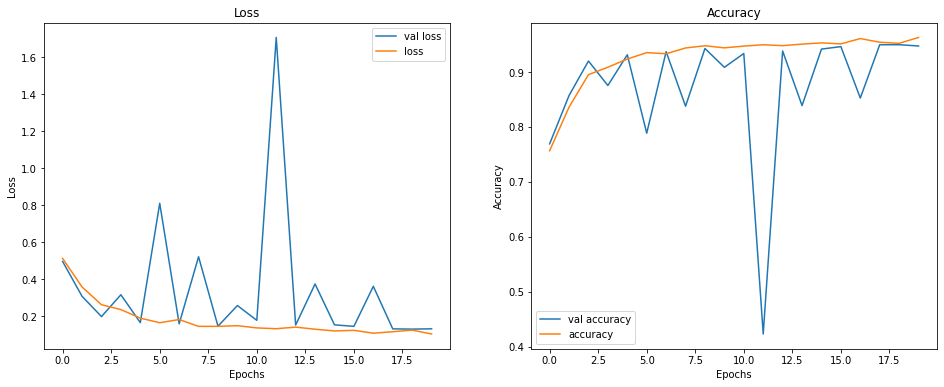

Test Accuracy = 0.62
Recall = 0.00


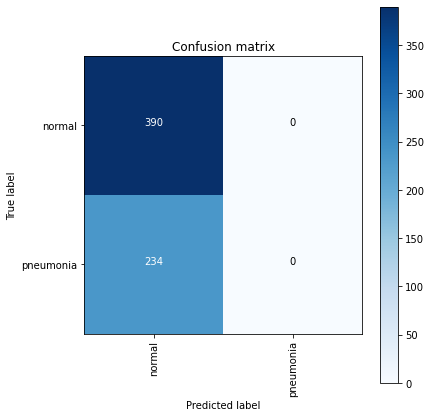

In [255]:
plot_results(history_base, model, test_img, 0.5, test_y)

In [31]:
def make_results(results, model, test_y, threshold = 0.5):
    
    accuracy = accuracy_score(test_y, predictions)
    recall = recall_score(test_y, predictions)
    return accuracy, recall

20/20 [==============================] - 0s 2ms/step - loss: 0.5745 - accuracy: 0.8141
Test set results accuracy 0.8141025900840759


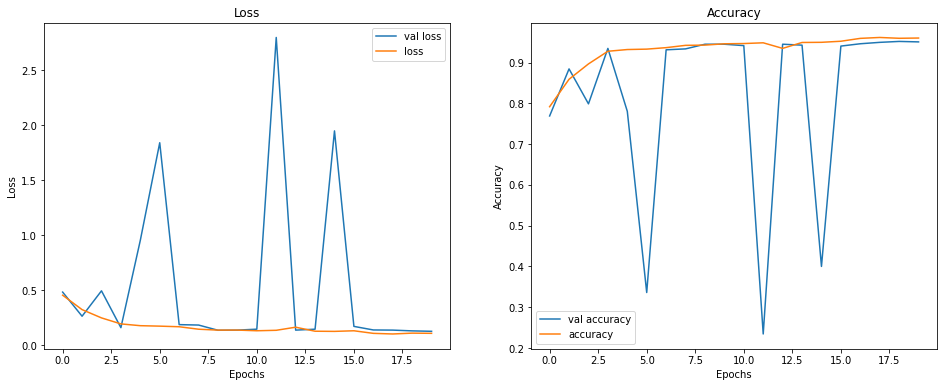

Test Accuracy = 0.87
Recall = 0.79


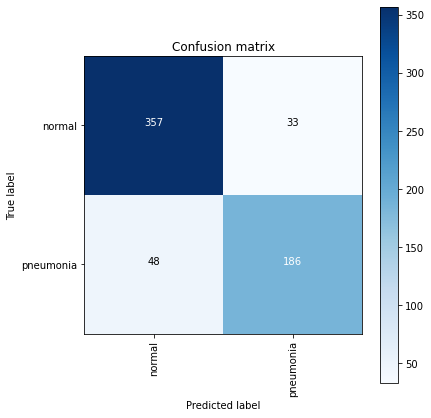

##### Baseline + regulization

We will use L2 regulization in each layer, to reduce overfitting.
Will try different L2 coefficients to determine the best one

In [32]:
L2_list = [0.001, 0.01, 0.1, 1]

In [33]:
L2_fin = []
for L2 in L2_list:
    model2 = models.Sequential()
    model2.add(layers.Dense(50, activation='relu', input_shape=(train_img.shape[1],), kernel_regularizer = l2(l2 = L2))) 
    model2.add(layers.Dense(25, activation='relu', kernel_regularizer = l2(l2 = L2)))
    model2.add(layers.Dense(10, activation='relu', kernel_regularizer = l2(l2 = L2)))
    model2.add(layers.Dense(1, activation='sigmoid'))
    model2.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    history_model2 = model2.fit(train_img,
                    train_y,
                    epochs=20,
                    batch_size=32,
                    validation_data=(val_img, val_y),
                    verbose = 0)
    results_test = model2.evaluate(test_img, test_y)
    L2_fin.append((L2, results_test[1]))
        


20/20 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.6250


In [34]:
L2_best = sorted(L2_fin, key = lambda x: x[1], reverse = True)[0][0]
print("Best L2 regulization parameter:", L2_best)

Best L2 regulization parameter: 0.01


In [35]:
model2 = models.Sequential()
model2.add(layers.Dense(50, activation='relu', input_shape=(train_img.shape[1],), kernel_regularizer = l2(l2 = L2_best)))
model2.add(layers.Dense(25, activation='relu', kernel_regularizer = l2(l2 = L2_best)))
model2.add(layers.Dense(10, activation='relu', kernel_regularizer = l2(l2 = L2_best)))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history_model2 = model2.fit(train_img,
                    train_y,
                    epochs=20,
                    batch_size=32,
                    validation_data=(val_img, val_y),
                    verbose = 1)


Epoch 1/20
156/156 [==============================] - 2s 8ms/step - loss: 1.8957 - accuracy: 0.7971 - val_loss: 1.6828 - val_accuracy: 0.8789
Epoch 2/20
156/156 [==============================] - 1s 7ms/step - loss: 1.6820 - accuracy: 0.8640 - val_loss: 2.7591 - val_accuracy: 0.2331
Epoch 3/20
156/156 [==============================] - 1s 7ms/step - loss: 1.5358 - accuracy: 0.8954 - val_loss: 1.5222 - val_accuracy: 0.8823
Epoch 4/20
156/156 [==============================] - 1s 8ms/step - loss: 1.4243 - accuracy: 0.9138 - val_loss: 3.8735 - val_accuracy: 0.2309
Epoch 5/20
156/156 [==============================] - 1s 7ms/step - loss: 1.4436 - accuracy: 0.8843 - val_loss: 2.2010 - val_accuracy: 0.7691
Epoch 6/20
156/156 [==============================] - 1s 7ms/step - loss: 1.2791 - accuracy: 0.9228 - val_loss: 1.2321 - val_accuracy: 0.9234
Epoch 7/20
156/156 [==============================] - 1s 7ms/step - loss: 1.2003 - accuracy: 0.9281 - val_loss: 1.4384 - val_accuracy: 0.7954
Epoch 

In [36]:
results_train = model2.evaluate(train_img, train_y)

156/156 [==============================] - 1s 4ms/step - loss: 0.9871 - accuracy: 0.8287


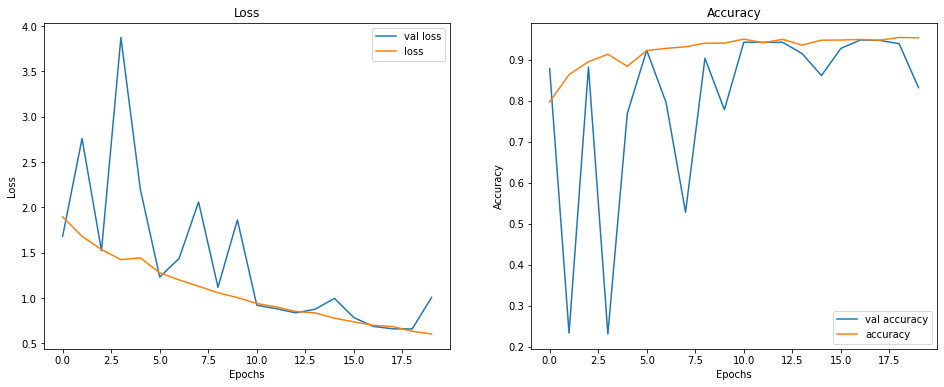

In [37]:
plot_results(history_model2, model2, test_img, 0.5, test_y)

In [38]:
results_test = model2.evaluate(test_img, test_y)
print(f"Test set results accuracy {results_test[1]}")

20/20 [==============================] - 0s 4ms/step - loss: 2.1565 - accuracy: 0.6554
Test set results accuracy 0.6554487347602844


##### Baseline + regulization + Dropout

In [39]:
model3 = models.Sequential()
model3.add(layers.Dense(50, activation='relu', input_shape=(train_img.shape[1],), kernel_regularizer = l2(l2 = L2_best)))
model3.add(layers.Dense(25, activation='relu', kernel_regularizer = l2(l2 = L2_best)))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(10, activation='relu', kernel_regularizer = l2(l2 = L2_best)))
model3.add(layers.Dense(1, activation='sigmoid'))


In [40]:
model3.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_model3 = model3.fit(train_img,
                    train_y,
                    epochs=20,
                    batch_size=32,
                    validation_data=(val_img, val_y))

Epoch 1/20
156/156 [==============================] - 2s 9ms/step - loss: 1.9831 - accuracy: 0.7326 - val_loss: 1.9134 - val_accuracy: 0.8354
Epoch 2/20
156/156 [==============================] - 1s 8ms/step - loss: 1.7499 - accuracy: 0.8309 - val_loss: 1.5887 - val_accuracy: 0.8937
Epoch 3/20
156/156 [==============================] - 1s 8ms/step - loss: 1.5977 - accuracy: 0.8723 - val_loss: 1.5809 - val_accuracy: 0.8617
Epoch 4/20
156/156 [==============================] - 1s 8ms/step - loss: 1.4642 - accuracy: 0.9053 - val_loss: 1.5883 - val_accuracy: 0.8491
Epoch 5/20
156/156 [==============================] - 1s 8ms/step - loss: 1.3926 - accuracy: 0.9081 - val_loss: 1.4227 - val_accuracy: 0.8857
Epoch 6/20
156/156 [==============================] - 1s 8ms/step - loss: 1.2965 - accuracy: 0.9140 - val_loss: 1.9466 - val_accuracy: 0.5920
Epoch 7/20
156/156 [==============================] - 1s 8ms/step - loss: 1.2315 - accuracy: 0.9222 - val_loss: 1.1522 - val_accuracy: 0.9383
Epoch 

In [41]:
results_train3 = model3.evaluate(train_img, train_y)

156/156 [==============================] - 1s 3ms/step - loss: 0.5880 - accuracy: 0.9621


In [42]:
results_test3 = model3.evaluate(test_img, test_y)
print(f"Test set results accuracy {results_test3[1]}")

20/20 [==============================] - 0s 3ms/step - loss: 0.8936 - accuracy: 0.8622
Test set results accuracy 0.8621794581413269


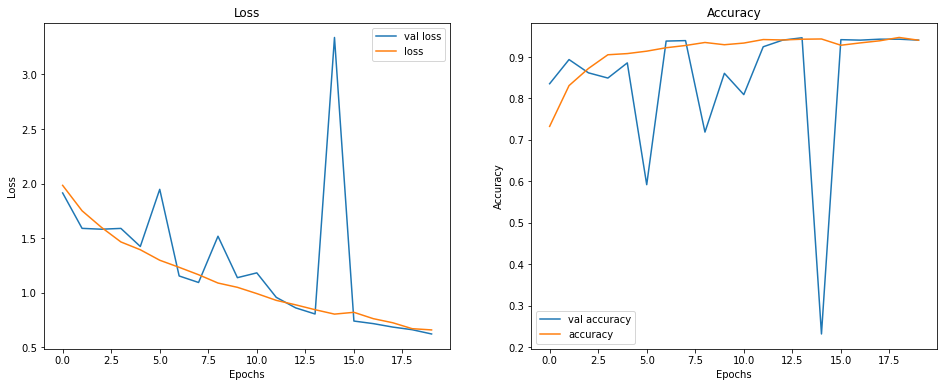

In [43]:
plot_results(history_model3, model3, test_img, 0.5, test_y)

##### Baseline + regulization + Dropout + Adam optimizer

In [44]:
model4 = models.Sequential()
model4.add(layers.Dense(50, activation='relu', input_shape=(train_img.shape[1],), kernel_regularizer = l2(l2 = L2_best)))
model4.add(layers.Dense(25, activation='relu', kernel_regularizer = l2(l2 = L2_best)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(10, activation='relu', kernel_regularizer = l2(l2 = L2_best)))
model4.add(layers.Dense(1, activation='sigmoid'))

In [45]:
model4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_model4 = model4.fit(train_img,
                    train_y,
                    epochs=20,
                    batch_size=32,
                    validation_data=(val_img, val_y))

Epoch 1/20
156/156 [==============================] - 2s 8ms/step - loss: 1.0910 - accuracy: 0.7860 - val_loss: 0.6053 - val_accuracy: 0.8469
Epoch 2/20
156/156 [==============================] - 1s 9ms/step - loss: 0.5252 - accuracy: 0.8894 - val_loss: 0.3949 - val_accuracy: 0.9394
Epoch 3/20
156/156 [==============================] - 1s 9ms/step - loss: 0.4057 - accuracy: 0.9228 - val_loss: 0.3787 - val_accuracy: 0.9177
Epoch 4/20
156/156 [==============================] - 2s 10ms/step - loss: 0.3794 - accuracy: 0.9206 - val_loss: 0.3032 - val_accuracy: 0.9383
Epoch 5/20
156/156 [==============================] - 1s 9ms/step - loss: 0.3417 - accuracy: 0.9285 - val_loss: 0.2763 - val_accuracy: 0.9406
Epoch 6/20
156/156 [==============================] - 1s 8ms/step - loss: 0.3380 - accuracy: 0.9321 - val_loss: 0.2781 - val_accuracy: 0.9451
Epoch 7/20
156/156 [==============================] - 1s 9ms/step - loss: 0.3187 - accuracy: 0.9335 - val_loss: 0.2661 - val_accuracy: 0.9383
Epoch

In [46]:
results_train4 = model4.evaluate(train_img, train_y)

156/156 [==============================] - 1s 3ms/step - loss: 0.2424 - accuracy: 0.9369


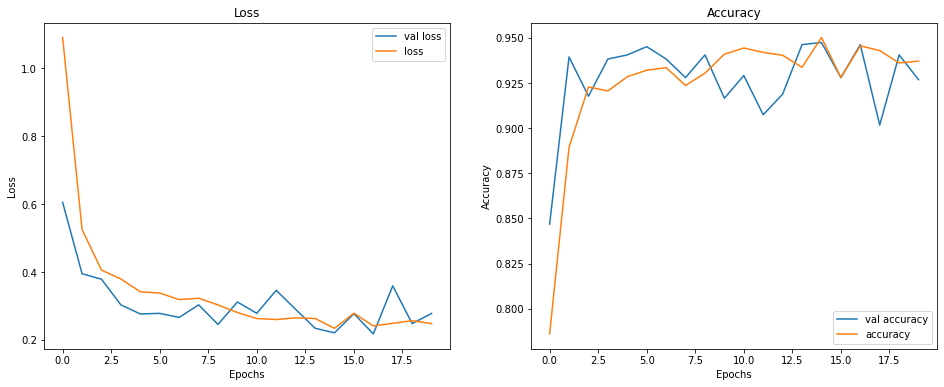

In [47]:
plot_results(history_model4, model4, test_img, 0.5, test_y)

In [48]:
results_test4 = model4.evaluate(test_img, test_y)
print(f"Test set results accuracy {results_test4[1]}")

20/20 [==============================] - 0s 3ms/step - loss: 0.8767 - accuracy: 0.7516
Test set results accuracy 0.7516025900840759


##### Baseline + regulization + Dropout + Adam optimizer + increased train time

In [128]:
model5 = models.Sequential()
model5.add(layers.Dense(50, activation='relu', input_shape=(train_img.shape[1],), kernel_regularizer = l2(l2 = 0.01)))
model5.add(layers.Dense(25, activation='relu', kernel_regularizer = l2(l2 = 0.01)))
model5.add(layers.Dropout(0.5))
model5.add(layers.Dense(10, activation='relu', kernel_regularizer = l2(l2 = 0.01)))
model5.add(layers.Dense(1, activation='sigmoid'))

In [129]:
model5.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_model5 = model5.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=50,
                    validation_data=(val_img, val_y))

Epoch 1/50
100/100 [==============================] - 4s 24ms/step - loss: 1.1496 - accuracy: 0.7880 - val_loss: 0.6891 - val_accuracy: 0.8354
Epoch 2/50
100/100 [==============================] - 2s 15ms/step - loss: 0.5916 - accuracy: 0.8656 - val_loss: 0.4662 - val_accuracy: 0.9337
Epoch 3/50
100/100 [==============================] - 1s 15ms/step - loss: 0.4746 - accuracy: 0.8829 - val_loss: 0.3888 - val_accuracy: 0.9371
Epoch 4/50
100/100 [==============================] - 1s 14ms/step - loss: 0.4302 - accuracy: 0.8948 - val_loss: 0.3495 - val_accuracy: 0.9349
Epoch 5/50
100/100 [==============================] - 1s 14ms/step - loss: 0.3842 - accuracy: 0.8958 - val_loss: 0.3256 - val_accuracy: 0.9280
Epoch 6/50
100/100 [==============================] - 1s 14ms/step - loss: 0.3225 - accuracy: 0.9303 - val_loss: 0.2768 - val_accuracy: 0.9440
Epoch 7/50
100/100 [==============================] - 2s 15ms/step - loss: 0.3245 - accuracy: 0.9271 - val_loss: 0.3010 - val_accuracy: 0.9383

In [51]:
results_train5 = model5.evaluate(train_img, train_y)

156/156 [==============================] - 1s 3ms/step - loss: 0.2265 - accuracy: 0.9285


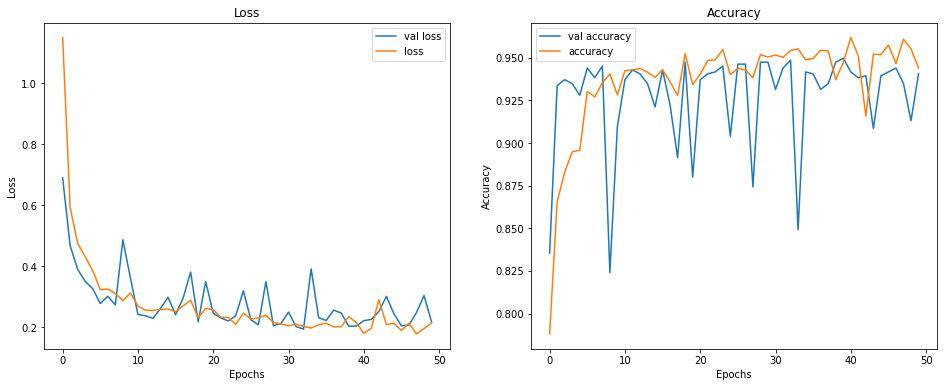

In [130]:
visualize_training_results(history_model5)

In [53]:
results_test5 = model5.evaluate(test_img, test_y)
print(f"Test set results accuracy {results_test5[1]}")

20/20 [==============================] - 0s 3ms/step - loss: 0.3749 - accuracy: 0.8734
Test set results accuracy 0.8733974099159241


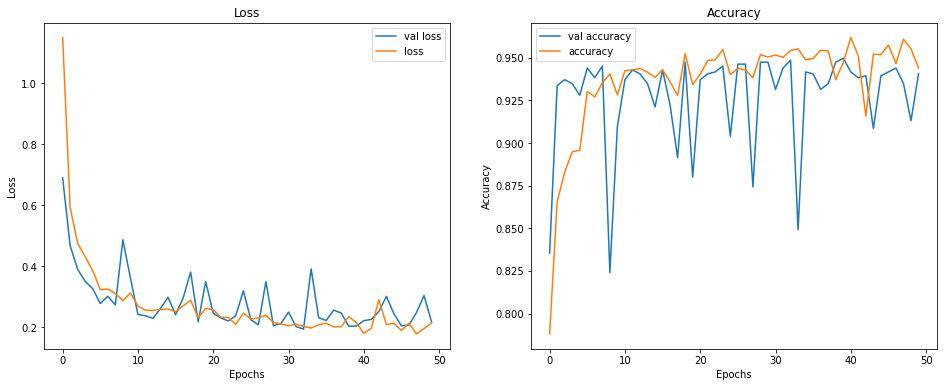

Test Accuracy = 0.86
Recall = 0.92


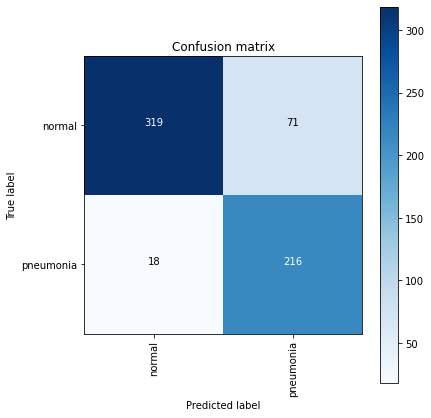

In [139]:
plot_results(history_model5, model5, test_img, 0.05, test_y)


##### CNN_1, shape 64

In [54]:
model_CNN = models.Sequential()
model_CNN.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64, 3)))
model_CNN.add(layers.MaxPooling2D((2, 2)))

model_CNN.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_CNN.add(layers.MaxPooling2D((2, 2)))

model_CNN.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_CNN.add(layers.MaxPooling2D((2, 2)))

model_CNN.add(layers.Flatten())
model_CNN.add(layers.Dense(30, activation='relu'))
model_CNN.add(layers.Dense(10, activation='relu'))
model_CNN.add(layers.Dense(1, activation='sigmoid'))

model_CNN.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])

In [55]:
history_CNN1 = model_CNN.fit(train_images,
                    train_y,
                    epochs=25,
                    batch_size=32,
                    validation_data=(val_images, val_y))

Epoch 1/25
156/156 [==============================] - 22s 138ms/step - loss: 0.5459 - accuracy: 0.7689 - val_loss: 0.5497 - val_accuracy: 0.7691
Epoch 2/25
156/156 [==============================] - 21s 135ms/step - loss: 0.4955 - accuracy: 0.7689 - val_loss: 0.6014 - val_accuracy: 0.7691
Epoch 3/25
156/156 [==============================] - 21s 134ms/step - loss: 0.4229 - accuracy: 0.7689 - val_loss: 0.3538 - val_accuracy: 0.7680
Epoch 4/25
156/156 [==============================] - 21s 132ms/step - loss: 0.3451 - accuracy: 0.8312 - val_loss: 0.3649 - val_accuracy: 0.8914
Epoch 5/25
156/156 [==============================] - 20s 130ms/step - loss: 0.3052 - accuracy: 0.8884 - val_loss: 0.3219 - val_accuracy: 0.8560
Epoch 6/25
156/156 [==============================] - 20s 130ms/step - loss: 0.2645 - accuracy: 0.9130 - val_loss: 0.2861 - val_accuracy: 0.8834
Epoch 7/25
156/156 [==============================] - 20s 128ms/step - loss: 0.2475 - accuracy: 0.9232 - val_loss: 0.2346 - val_ac

In [56]:
results_test = model_CNN.evaluate(test_images, test_y)

20/20 [==============================] - 0s 22ms/step - loss: 0.9262 - accuracy: 0.7724


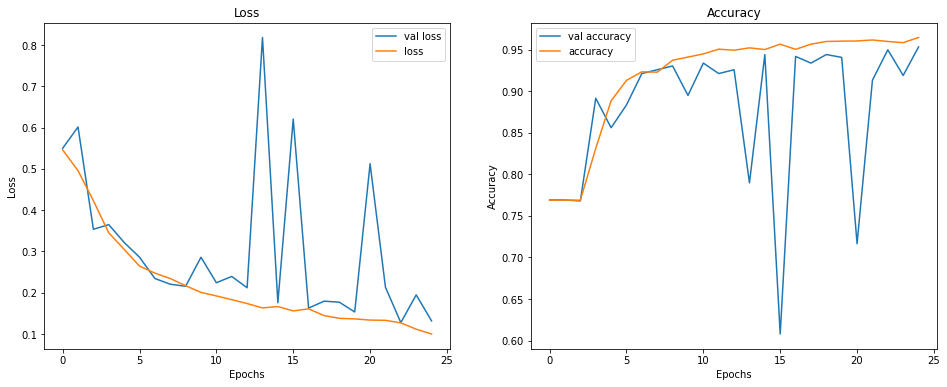

In [57]:
visualize_training_results(history_CNN1)

### CNN_2, shape 64 + dropout + regulization

In [58]:
model_CNN2 = models.Sequential()
model_CNN2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64, 3)))
model_CNN2.add(layers.MaxPooling2D((2, 2)))

model_CNN2.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_CNN2.add(layers.MaxPooling2D((2, 2)))

model_CNN2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_CNN2.add(layers.MaxPooling2D((2, 2)))

model_CNN2.add(layers.Flatten())
model_CNN2.add(layers.Dense(40, activation='relu', kernel_regularizer = l2(l2 = L2_best)))
model_CNN2.add(layers.Dense(1, activation='sigmoid'))

model_CNN2.compile(loss='binary_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

In [59]:
history_CNN2 = model_CNN2.fit(train_images,
                    train_y,
                    epochs=25,
                    batch_size=32,
                    validation_data=(val_images, val_y))

Epoch 1/25
156/156 [==============================] - 20s 124ms/step - loss: 0.4831 - accuracy: 0.8557 - val_loss: 0.2132 - val_accuracy: 0.9486
Epoch 2/25
156/156 [==============================] - 19s 124ms/step - loss: 0.1962 - accuracy: 0.9404 - val_loss: 0.1703 - val_accuracy: 0.9497
Epoch 3/25
156/156 [==============================] - 19s 124ms/step - loss: 0.1487 - accuracy: 0.9591 - val_loss: 0.3163 - val_accuracy: 0.8800
Epoch 4/25
156/156 [==============================] - 19s 124ms/step - loss: 0.1345 - accuracy: 0.9643 - val_loss: 0.1280 - val_accuracy: 0.9634
Epoch 5/25
156/156 [==============================] - 19s 124ms/step - loss: 0.1188 - accuracy: 0.9682 - val_loss: 0.1223 - val_accuracy: 0.9611
Epoch 6/25
156/156 [==============================] - 19s 124ms/step - loss: 0.1131 - accuracy: 0.9688 - val_loss: 0.1524 - val_accuracy: 0.9509
Epoch 7/25
156/156 [==============================] - 19s 124ms/step - loss: 0.0938 - accuracy: 0.9758 - val_loss: 0.1022 - val_ac

In [60]:
results_test = model_CNN2.evaluate(test_images, test_y)

20/20 [==============================] - 0s 21ms/step - loss: 0.6372 - accuracy: 0.8590


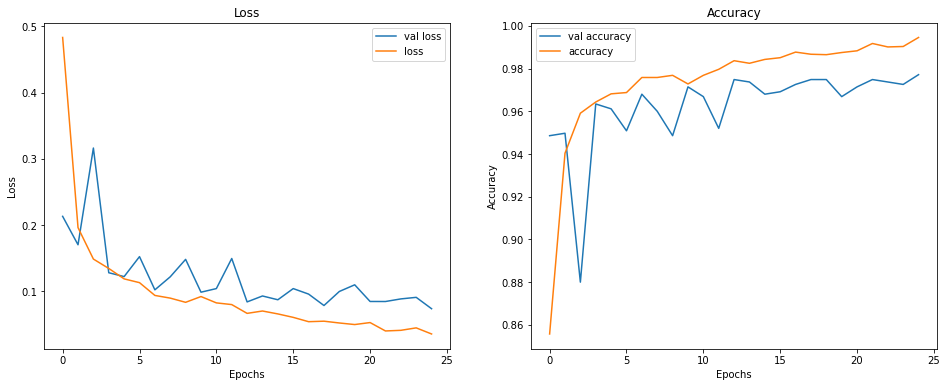

In [61]:
visualize_training_results(history_CNN2)

### CNN_3, shape 100 + dropout + regulization

In [62]:
# # get all the data in the directory split/train, and reshape them
# train_generator_100 = ImageDataGenerator(rescale=1./255).flow_from_directory(
#         train_folder, 
#         target_size=(100, 100), batch_size= train_img_number)

# # get all the data in the directory split/validation, and reshape them
# val_generator_100 = ImageDataGenerator(rescale=1./255).flow_from_directory(
#         val_folder, 
#         target_size=(100, 100), batch_size = val_img_number)

# # get all the data in the directory split/test, and reshape them
# test_generator_100 = ImageDataGenerator(rescale=1./255).flow_from_directory(
#         test_folder, 
#         target_size=(100, 100), batch_size = test_img_number) 

# Reshape images to 100x100
train_generator_100, val_generator_100, test_generator_100 = process_data_no_aug((100,100))

train_images2, train_labels2 = next(train_generator_100)
test_images2, test_labels2 = next(test_generator_100)
val_images2, val_labels2 = next(val_generator_100)




Found 4963 images belonging to 2 classes.
Found 875 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [65]:
# Reshape images
train_img2 = train_images2.reshape(train_images2.shape[0], -1)
test_img2 = test_images2.reshape(test_images2.shape[0], -1)
val_img2 = val_images2.reshape(val_images2.shape[0], -1)

# Check the shape after. 
print(train_img2.shape)
print(test_img2.shape)
print(val_img2.shape)

(4963, 30000)
(624, 30000)
(875, 30000)


In [66]:
# Labels
train_y2 = np.reshape(train_labels[:,0], (train_img_number,1))
test_y2 = np.reshape(test_labels[:,0], (test_img_number,1))
val_y2 = np.reshape(val_labels[:,0], (val_img_number,1))

In [67]:
# Create model.
model_CNN3 = models.Sequential()
model_CNN3.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(100 ,100, 3)))
model_CNN3.add(layers.MaxPooling2D((2, 2)))

model_CNN3.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_CNN3.add(layers.MaxPooling2D((2, 2)))

model_CNN3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_CNN3.add(layers.MaxPooling2D((2, 2)))

model_CNN3.add(layers.Flatten())
model_CNN3.add(layers.Dense(30, activation='relu'))
model_CNN3.add(layers.Dense(10, activation='relu'))
model_CNN3.add(layers.Dense(1, activation='sigmoid'))

model_CNN3.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])

In [68]:
history_CNN3 = model_CNN3.fit(train_images2,
                    train_y2,
                    epochs=25,
                    batch_size=50,
                    validation_data=(val_images2, val_y2))

Epoch 1/25
100/100 [==============================] - 33s 330ms/step - loss: 0.5432 - accuracy: 0.7689 - val_loss: 0.5224 - val_accuracy: 0.7691
Epoch 2/25
100/100 [==============================] - 40s 401ms/step - loss: 0.4827 - accuracy: 0.7745 - val_loss: 0.4499 - val_accuracy: 0.7931
Epoch 3/25
100/100 [==============================] - 42s 425ms/step - loss: 0.4213 - accuracy: 0.8094 - val_loss: 0.3486 - val_accuracy: 0.8137
Epoch 4/25
100/100 [==============================] - 43s 432ms/step - loss: 0.3412 - accuracy: 0.8565 - val_loss: 0.2624 - val_accuracy: 0.8914
Epoch 5/25
100/100 [==============================] - 43s 429ms/step - loss: 0.2776 - accuracy: 0.8839 - val_loss: 0.3161 - val_accuracy: 0.8594
Epoch 6/25
100/100 [==============================] - 42s 424ms/step - loss: 0.2364 - accuracy: 0.9085 - val_loss: 0.2025 - val_accuracy: 0.9177
Epoch 7/25
100/100 [==============================] - 42s 418ms/step - loss: 0.2020 - accuracy: 0.9204 - val_loss: 0.1733 - val_ac

In [69]:
results_test = model_CNN3.evaluate(test_images2, test_y2)

20/20 [==============================] - 1s 61ms/step - loss: 0.6100 - accuracy: 0.8349


In [70]:
model_CNN4 = models.Sequential()
model_CNN4.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(100 ,100, 3)))
model_CNN4.add(layers.MaxPooling2D((2, 2)))

model_CNN4.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_CNN4.add(layers.MaxPooling2D((2, 2)))

model_CNN4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_CNN4.add(layers.MaxPooling2D((2, 2)))

model_CNN4.add(layers.Flatten())
model_CNN4.add(layers.Dense(30, activation='relu', kernel_regularizer = l2(l2 = 0.01)))
model_CNN4.add(layers.Dropout(0.3))
model_CNN4.add(layers.Dense(1, activation='sigmoid'))

model_CNN4.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])

In [71]:
history_CNN4 = model_CNN4.fit(train_images2,
                    train_y2,
                    epochs=20,
                    batch_size=32,
                    validation_data=(val_images2, val_y2))

Epoch 1/20
156/156 [==============================] - 42s 265ms/step - loss: 1.1190 - accuracy: 0.7689 - val_loss: 1.1264 - val_accuracy: 0.7691
Epoch 2/20
156/156 [==============================] - 42s 271ms/step - loss: 1.0030 - accuracy: 0.7894 - val_loss: 0.9611 - val_accuracy: 0.7726
Epoch 3/20
156/156 [==============================] - 42s 267ms/step - loss: 0.8604 - accuracy: 0.8481 - val_loss: 1.7133 - val_accuracy: 0.3440
Epoch 4/20
156/156 [==============================] - 41s 263ms/step - loss: 0.7491 - accuracy: 0.8908 - val_loss: 0.7265 - val_accuracy: 0.8983
Epoch 5/20
156/156 [==============================] - 41s 264ms/step - loss: 0.6815 - accuracy: 0.9134 - val_loss: 0.7580 - val_accuracy: 0.8731
Epoch 6/20
156/156 [==============================] - 41s 263ms/step - loss: 0.6127 - accuracy: 0.9327 - val_loss: 0.5934 - val_accuracy: 0.9337
Epoch 7/20
156/156 [==============================] - 39s 248ms/step - loss: 0.5724 - accuracy: 0.9432 - val_loss: 0.5649 - val_ac

In [78]:
results_test = model_CNN4.evaluate(test_images2, test_y2)

20/20 [==============================] - 1s 30ms/step - loss: 0.8992 - accuracy: 0.8029


##### argumented CNN 100 batch 64/32

In [27]:
train_datagen_arg_100 = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.1, 
                                   height_shift_range=0.1, 
                                   shear_range=0.2, 
                                   horizontal_flip=False)
test_generator_arg_100 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(100, 100), 
        batch_size = test_img_number,
        class_mode='binary') 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator_arg_100 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(100, 100),
        batch_size = 32,
        class_mode='binary')

# get all the data in the directory split/train (542 images), and reshape them
train_generator_arg_100 = train_datagen_arg_100.flow_from_directory(
        train_folder, target_size=(100, 100),
        batch_size = 64, class_mode='binary')


Found 624 images belonging to 2 classes.
Found 875 images belonging to 2 classes.
Found 4963 images belonging to 2 classes.


In [28]:
train_images_100_arg, train_labels_100_arg = next(train_generator_arg_100)
test_images_100_arg, test_labels_100_arg = next(test_generator_arg_100)
val_images_100_arg, val_labels_100_arg = next(val_generator_arg_100)

In [208]:
model_CNN6 = models.Sequential()
model_CNN6.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(100 ,100, 3)))
model_CNN6.add(layers.MaxPooling2D((2, 2)))

model_CNN6.add(layers.Conv2D(32, (4, 4), activation='relu', kernel_regularizer = l2(l2 = 0.01)))
model_CNN6.add(layers.MaxPooling2D((2, 2)))

model_CNN6.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_CNN6.add(layers.MaxPooling2D((2, 2)))

model_CNN6.add(layers.Flatten())
model_CNN6.add(layers.Dense(50, activation='relu', kernel_regularizer = l2(l2 = 0.01)))
model_CNN6.add(layers.Dropout(0.3))
model_CNN6.add(layers.Dense(1, activation='sigmoid'))

model_CNN6.compile(loss='binary_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

In [209]:
history_CNN6 = model_CNN6.fit_generator(train_generator_arg_100, 
                                steps_per_epoch=25, 
                                epochs=20, 
                                validation_data=val_generator_arg_100, 
                                validation_steps=25)

Epoch 1/20
25/25 [==============================] - 84s 3s/step - loss: 1.1887 - accuracy: 0.7700 - val_loss: 0.7701 - val_accuracy: 0.7688
Epoch 2/20
25/25 [==============================] - 75s 3s/step - loss: 0.6846 - accuracy: 0.7738 - val_loss: 0.6427 - val_accuracy: 0.7625
Epoch 3/20
25/25 [==============================] - 72s 3s/step - loss: 0.5966 - accuracy: 0.7670 - val_loss: 0.5496 - val_accuracy: 0.7613
Epoch 4/20
25/25 [==============================] - 71s 3s/step - loss: 0.5725 - accuracy: 0.7785 - val_loss: 0.5484 - val_accuracy: 0.7675
Epoch 5/20
25/25 [==============================] - 74s 3s/step - loss: 0.5439 - accuracy: 0.7738 - val_loss: 0.4951 - val_accuracy: 0.8500
Epoch 6/20
25/25 [==============================] - 71s 3s/step - loss: 0.4568 - accuracy: 0.8288 - val_loss: 0.3919 - val_accuracy: 0.8763
Epoch 7/20
25/25 [==============================] - 70s 3s/step - loss: 0.4304 - accuracy: 0.8381 - val_loss: 0.3801 - val_accuracy: 0.8625
Epoch 8/20
25/25 [==

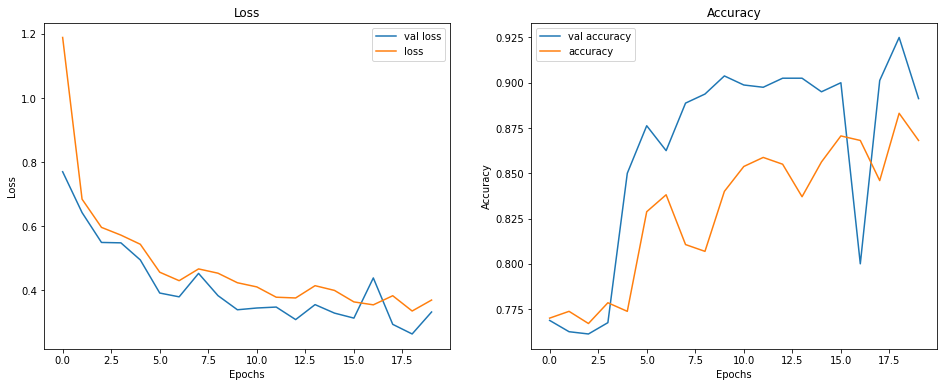

In [211]:
visualize_training_results(history_CNN6)

In [216]:
test_labels_100_arg[:,]

array([1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0.

In [33]:
test_y_arg_100_64 = np.reshape(test_labels_100_arg[:,], (test_img_number,1))


In [ ]:
results_test = model_CNN6.evaluate(test_images_100_arg, test_y_arg_100_64)

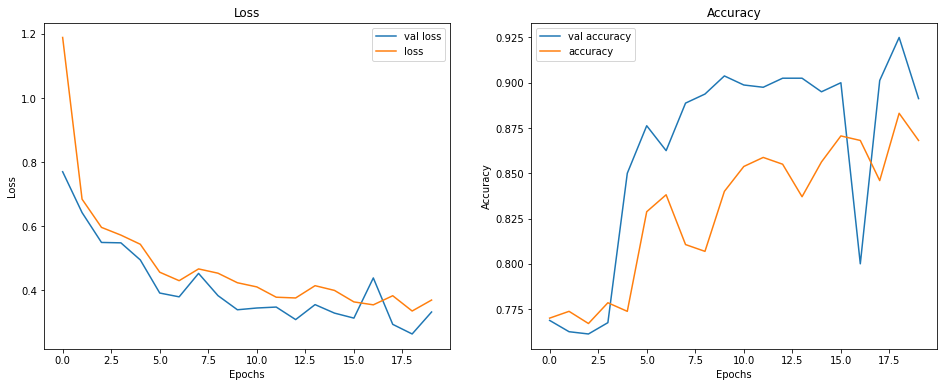

Test Accuracy = 0.62
Recall = 1.00


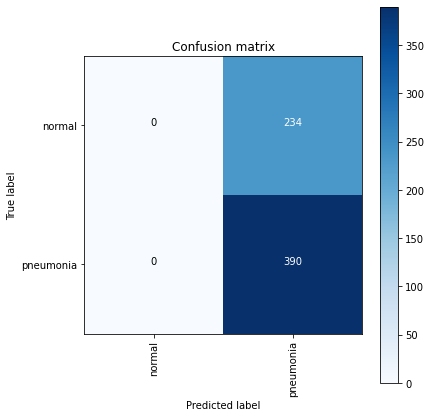

In [386]:
plot_results(history_CNN6, model_CNN6, test_images_100_arg, 0.2, test_y_arg_100_64)


argumented CNN 100 batch 64/32 Rmsprop

In [229]:
model_CNN8 = models.Sequential()
model_CNN8.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(100 ,100, 3)))
model_CNN8.add(layers.MaxPooling2D((2, 2)))

model_CNN8.add(layers.Conv2D(32, (4, 4), activation='relu', kernel_regularizer = l2(l2 = 0.01)))
model_CNN8.add(layers.MaxPooling2D((2, 2)))

model_CNN8.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_CNN8.add(layers.MaxPooling2D((2, 2)))

model_CNN8.add(layers.Flatten())
model_CNN8.add(layers.Dense(50, activation='relu', kernel_regularizer = l2(l2 = 0.01)))
model_CNN8.add(layers.Dropout(0.3))
model_CNN8.add(layers.Dense(1, activation='sigmoid'))

model_CNN8.compile(loss='binary_crossentropy',
              optimizer="rmsprop",
              metrics=['accuracy'])


In [231]:
history_CNN8 = model_CNN8.fit_generator(train_generator_arg_100, 
                                steps_per_epoch=25, 
                                epochs=20, 
                                validation_data=val_generator_arg_100, 
                                validation_steps=25)

Epoch 1/20
25/25 [==============================] - 73s 3s/step - loss: 1.0076 - accuracy: 0.7563 - val_loss: 0.7334 - val_accuracy: 0.7688
Epoch 2/20
25/25 [==============================] - 86s 3s/step - loss: 0.6810 - accuracy: 0.7494 - val_loss: 0.5978 - val_accuracy: 0.7700
Epoch 3/20
25/25 [==============================] - 87s 4s/step - loss: 0.5885 - accuracy: 0.7651 - val_loss: 0.6251 - val_accuracy: 0.7350
Epoch 4/20
25/25 [==============================] - 84s 3s/step - loss: 0.5404 - accuracy: 0.7756 - val_loss: 0.5322 - val_accuracy: 0.7800
Epoch 5/20
25/25 [==============================] - 89s 4s/step - loss: 0.5094 - accuracy: 0.7856 - val_loss: 0.6288 - val_accuracy: 0.7775
Epoch 6/20
25/25 [==============================] - 85s 3s/step - loss: 0.5251 - accuracy: 0.7700 - val_loss: 0.6036 - val_accuracy: 0.6812
Epoch 7/20
25/25 [==============================] - 86s 3s/step - loss: 0.5003 - accuracy: 0.7713 - val_loss: 0.5302 - val_accuracy: 0.7125
Epoch 8/20
25/25 [==

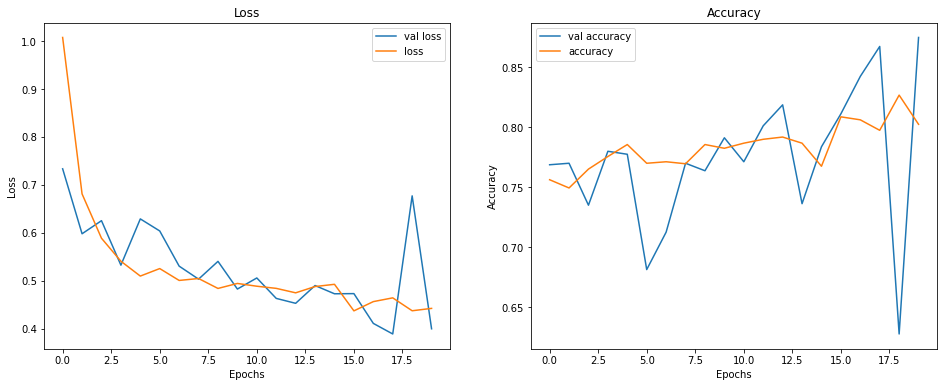

In [233]:
visualize_training_results(history_CNN8)

In [232]:
results_test = model_CNN8.evaluate(test_images_100_arg, test_y_arg_100_64)

20/20 [==============================] - 2s 90ms/step - loss: 0.4986 - accuracy: 0.7981


In [236]:
model_CNN9 = models.Sequential()
model_CNN9.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(100 ,100, 3)))
model_CNN9.add(layers.MaxPooling2D((2, 2)))

model_CNN9.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_CNN9.add(layers.MaxPooling2D((2, 2)))

model_CNN9.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_CNN9.add(layers.MaxPooling2D((2, 2)))

model_CNN9.add(layers.Flatten())
model_CNN9.add(layers.Dropout(0.3))
model_CNN9.add(layers.Dense(50, activation='relu', kernel_regularizer = l2(l2 = 0.01)))
model_CNN9.add(layers.Dropout(0.3))
model_CNN9.add(layers.Dense(1, activation='sigmoid'))

model_CNN9.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [237]:
history_CNN9 = model_CNN9.fit_generator(train_generator_arg_100, 
                                steps_per_epoch=25, 
                                epochs=50, 
                                validation_data=val_generator_arg_100, 
                                validation_steps=25)

Epoch 1/50
25/25 [==============================] - 82s 3s/step - loss: 1.0392 - accuracy: 0.7663 - val_loss: 0.6851 - val_accuracy: 0.7738
Epoch 2/50
25/25 [==============================] - 72s 3s/step - loss: 0.5974 - accuracy: 0.7887 - val_loss: 0.5632 - val_accuracy: 0.7700
Epoch 3/50
25/25 [==============================] - 68s 3s/step - loss: 0.5247 - accuracy: 0.7823 - val_loss: 0.4154 - val_accuracy: 0.7862
Epoch 4/50
25/25 [==============================] - 69s 3s/step - loss: 0.4355 - accuracy: 0.8180 - val_loss: 0.3635 - val_accuracy: 0.8662
Epoch 5/50
25/25 [==============================] - 70s 3s/step - loss: 0.4411 - accuracy: 0.8231 - val_loss: 0.5424 - val_accuracy: 0.7387
Epoch 6/50
25/25 [==============================] - 73s 3s/step - loss: 0.4262 - accuracy: 0.8313 - val_loss: 0.3859 - val_accuracy: 0.8500
Epoch 7/50
25/25 [==============================] - 70s 3s/step - loss: 0.3857 - accuracy: 0.8494 - val_loss: 0.5327 - val_accuracy: 0.7287
Epoch 8/50
25/25 [==

In [328]:
results_test = model_CNN9.evaluate(test_images_100_arg, test_y_arg_100_64)

20/20 [==============================] - 1s 44ms/step - loss: 0.3357 - accuracy: 0.8782


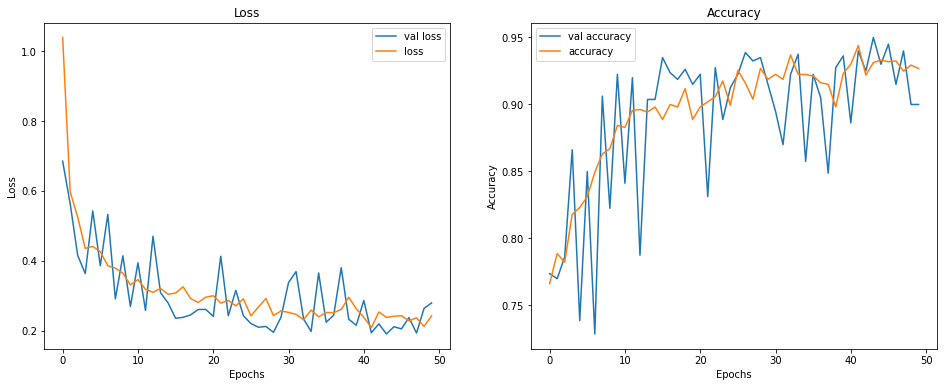

In [327]:
visualize_training_results(history_CNN9)

In [79]:
plot_results(history_CNN9, model_CNN9, test_images_100_arg, 0.3, test_y_arg_100_64)



NameError: name 'history_CNN9' is not defined

In [22]:
base_model_cnn = VGG16(
        weights='imagenet',
        include_top=False, 
        input_shape=(100,100,3))



2022-02-15 17:23:36.779690: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
model_new = models.Sequential()
model_new.add(base_model_cnn)
model_new.add(layers.Flatten())
model_new.add(layers.Dense(1000, activation="relu", kernel_regularizer = l2(l2 = 0.01)))
model_new.add(layers.Dropout(0.6))
model_new.add(layers.Dense(100, activation="relu", kernel_regularizer = l2(l2 = 0.01)))
model_new.add(layers.Dropout(0.5))
model_new.add(layers.Dense(1,activation="sigmoid"))
model_new.compile(
    loss='binary_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)

model_new.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_3 (Dense)             (None, 1000)              4609000   
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               100100    
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [29]:
history__new = model_new.fit_generator(train_generator_arg_100, 
                                steps_per_epoch=25, 
                                epochs=10, 
                                validation_data=val_generator_arg_100, 
                                validation_steps=25)

Epoch 1/10
25/25 [==============================] - 406s 16s/step - loss: 8.7843 - accuracy: 0.7327 - val_loss: 3.1118 - val_accuracy: 0.7750
Epoch 2/10
25/25 [==============================] - 337s 13s/step - loss: 2.1624 - accuracy: 0.7706 - val_loss: 1.5115 - val_accuracy: 0.7700
Epoch 3/10
25/25 [==============================] - 308s 12s/step - loss: 1.2565 - accuracy: 0.7738 - val_loss: 1.1380 - val_accuracy: 0.7700
Epoch 4/10
25/25 [==============================] - 294s 12s/step - loss: 0.8747 - accuracy: 0.8094 - val_loss: 0.7975 - val_accuracy: 0.8037
Epoch 5/10
25/25 [==============================] - 289s 12s/step - loss: 0.7058 - accuracy: 0.8498 - val_loss: 0.6287 - val_accuracy: 0.8500
Epoch 6/10
25/25 [==============================] - 288s 12s/step - loss: 0.5597 - accuracy: 0.8854 - val_loss: 0.6680 - val_accuracy: 0.8050
Epoch 7/10
25/25 [==============================] - 300s 12s/step - loss: 0.5420 - accuracy: 0.8544 - val_loss: 0.4419 - val_accuracy: 0.8975
Epoch 

In [34]:
model_new.evaluate(test_images_100_arg, test_y_arg_100_64)

20/20 [==============================] - 19s 953ms/step - loss: 0.5351 - accuracy: 0.8397


[0.535062849521637, 0.8397436141967773]

In [36]:
model_new2 = models.Sequential()
model_new2.add(base_model_cnn)
model_new2.add(layers.Flatten())
model_new2.add(layers.Dense(300, activation="relu", kernel_regularizer = l2(l2 = 0.01)))
model_new2.add(layers.Dropout(0.7))
model_new2.add(layers.Dense(50, activation="relu", kernel_regularizer = l2(l2 = 0.01)))
model_new2.add(layers.Dropout(0.6))
model_new2.add(layers.Dense(1,activation="sigmoid"))
model_new2.compile(
    loss='binary_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)



In [37]:
history__new2 = model_new2.fit_generator(train_generator_arg_100, 
                                steps_per_epoch=25, 
                                epochs=10, 
                                validation_data=val_generator_arg_100, 
                                validation_steps=25)

Epoch 1/10
25/25 [==============================] - 301s 12s/step - loss: 3.6750 - accuracy: 0.7333 - val_loss: 1.6207 - val_accuracy: 0.8462
Epoch 2/10
25/25 [==============================] - 291s 12s/step - loss: 1.1641 - accuracy: 0.8581 - val_loss: 0.9786 - val_accuracy: 0.8575
Epoch 3/10
25/25 [==============================] - 281s 11s/step - loss: 0.8917 - accuracy: 0.8822 - val_loss: 0.7615 - val_accuracy: 0.8988
Epoch 4/10
25/25 [==============================] - 289s 12s/step - loss: 0.7630 - accuracy: 0.8721 - val_loss: 0.6537 - val_accuracy: 0.9038
Epoch 5/10
25/25 [==============================] - 288s 12s/step - loss: 0.6301 - accuracy: 0.8875 - val_loss: 0.5510 - val_accuracy: 0.9162
Epoch 6/10
25/25 [==============================] - 287s 12s/step - loss: 0.5614 - accuracy: 0.9000 - val_loss: 0.4992 - val_accuracy: 0.8988
Epoch 7/10
25/25 [==============================] - 283s 11s/step - loss: 0.4812 - accuracy: 0.9115 - val_loss: 0.4651 - val_accuracy: 0.8888
Epoch 

In [39]:
model_new2.evaluate(test_images_100_arg, test_y_arg_100_64)

20/20 [==============================] - 20s 989ms/step - loss: 0.5724 - accuracy: 0.8221


[0.5724180936813354, 0.8221153616905212]

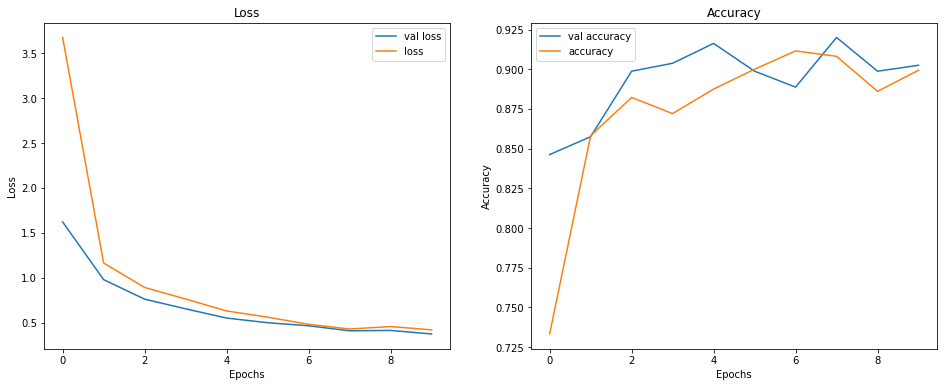

Test Accuracy = 0.76
Recall = 0.98


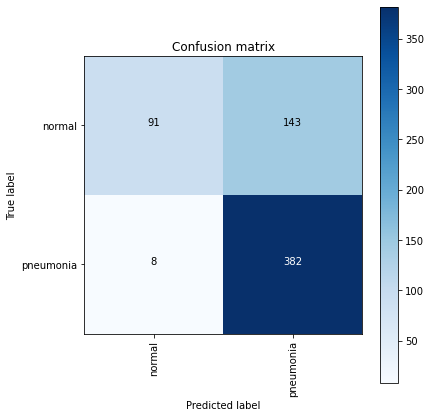

In [42]:
plot_results(history__new2, model_new2, test_images_100_arg, 0.3, test_y_arg_100_64)


In [44]:
model_new3 = models.Sequential()
model_new3.add(base_model_cnn)
model_new3.add(layers.Flatten())
model_new3.add(layers.Dense(1000, activation="relu", kernel_regularizer = l2(l2 = 0.01)))
model_new3.add(layers.Dropout(0.7))
model_new3.add(layers.Dense(1000, activation="relu", kernel_regularizer = l2(l2 = 0.01)))
model_new3.add(layers.Dropout(0.7))
model_new3.add(layers.Dense(300, activation="relu", kernel_regularizer = l2(l2 = 0.01)))
model_new3.add(layers.Dropout(0.6))
model_new3.add(layers.Dense(1,activation="sigmoid"))
model_new3.compile(
    loss='binary_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])

In [46]:
history__new3 = model_new3.fit_generator(train_generator_arg_100, 
                                steps_per_epoch=25, 
                                epochs=10, 
                                validation_data=val_generator_arg_100, 
                                validation_steps=25)

Epoch 1/10
25/25 [==============================] - 302s 12s/step - loss: 0.2512 - accuracy: 0.9262 - val_loss: 0.2042 - val_accuracy: 0.9513
Epoch 2/10
25/25 [==============================] - 325s 13s/step - loss: 0.2076 - accuracy: 0.9440 - val_loss: 0.1869 - val_accuracy: 0.9513
Epoch 3/10
25/25 [==============================] - 323s 13s/step - loss: 0.2802 - accuracy: 0.9187 - val_loss: 0.4402 - val_accuracy: 0.8375
Epoch 4/10
25/25 [==============================] - 353s 14s/step - loss: 0.2825 - accuracy: 0.9206 - val_loss: 0.2363 - val_accuracy: 0.9312
Epoch 5/10
25/25 [==============================] - 325s 13s/step - loss: 0.2031 - accuracy: 0.9478 - val_loss: 0.2302 - val_accuracy: 0.9287
Epoch 6/10
25/25 [==============================] - 337s 13s/step - loss: 0.2296 - accuracy: 0.9362 - val_loss: 0.2091 - val_accuracy: 0.9425
Epoch 7/10
25/25 [==============================] - 374s 15s/step - loss: 0.4920 - accuracy: 0.8637 - val_loss: 0.3554 - val_accuracy: 0.8662
Epoch 

In [47]:
model_new3.evaluate(test_images_100_arg, test_y_arg_100_64)

20/20 [==============================] - 28s 1s/step - loss: 0.5776 - accuracy: 0.8221


[0.5775743126869202, 0.8221153616905212]

In [80]:
base_model_cnn = VGG16(
        weights='imagenet',
        include_top=False, 
        input_shape=(100,100,3))
base_model_cnn.trainable = False

In [81]:
model_new7 = models.Sequential()
model_new7.add(base_model_cnn)
model_new7.add(layers.Flatten())
model_new7.add(layers.Dense(1000, activation="relu", kernel_regularizer = l2(l2 = 0.01)))
model_new7.add(layers.Dropout(0.7))
model_new7.add(layers.Dense(1000, activation="relu", kernel_regularizer = l2(l2 = 0.01)))
model_new7.add(layers.Dropout(0.7))
model_new7.add(layers.Dense(300, activation="relu", kernel_regularizer = l2(l2 = 0.01)))
model_new7.add(layers.Dropout(0.6))
model_new7.add(layers.Dense(1,activation="sigmoid"))
model_new7.compile(
    loss='binary_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])

In [82]:
history__new7 = model_new7.fit_generator(train_generator_arg_100, 
                                steps_per_epoch=25, 
                                epochs=10, 
                                validation_data=val_generator_arg_100, 
                                validation_steps=25)

Epoch 1/10
25/25 [==============================] - 108s 4s/step - loss: 19.2365 - accuracy: 0.6819 - val_loss: 10.7639 - val_accuracy: 0.7738
Epoch 2/10
25/25 [==============================] - 121s 5s/step - loss: 8.3897 - accuracy: 0.7390 - val_loss: 6.4574 - val_accuracy: 0.7713
Epoch 3/10
25/25 [==============================] - 117s 5s/step - loss: 5.5054 - accuracy: 0.8281 - val_loss: 4.5104 - val_accuracy: 0.9075
Epoch 4/10
25/25 [==============================] - 118s 5s/step - loss: 3.9933 - accuracy: 0.8775 - val_loss: 3.3703 - val_accuracy: 0.9262
Epoch 5/10
25/25 [==============================] - 113s 5s/step - loss: 3.0395 - accuracy: 0.8881 - val_loss: 2.5644 - val_accuracy: 0.9325
Epoch 6/10
25/25 [==============================] - 112s 4s/step - loss: 2.3592 - accuracy: 0.8931 - val_loss: 2.0093 - val_accuracy: 0.9337
Epoch 7/10
25/25 [==============================] - 112s 4s/step - loss: 1.8496 - accuracy: 0.9075 - val_loss: 1.5801 - val_accuracy: 0.9388
Epoch 8/10


In [83]:
model_new7.evaluate(test_images_100_arg, test_y_arg_100_64)

20/20 [==============================] - 26s 1s/step - loss: 0.9464 - accuracy: 0.9231


[0.9463552832603455, 0.9230769276618958]

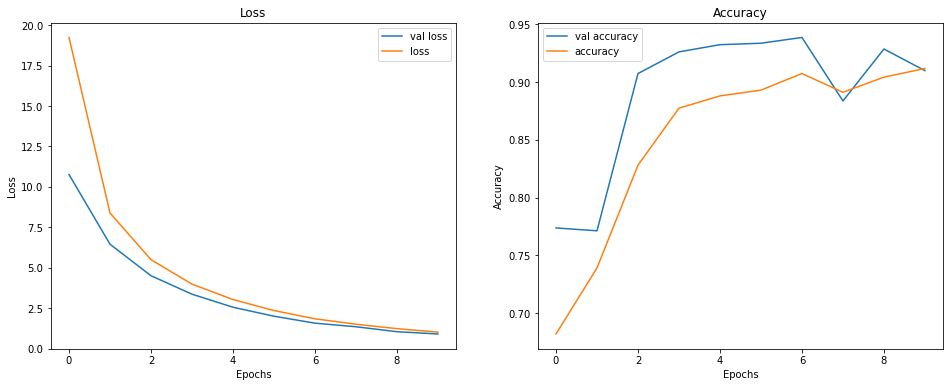

Test Accuracy = 0.92
Recall = 0.95


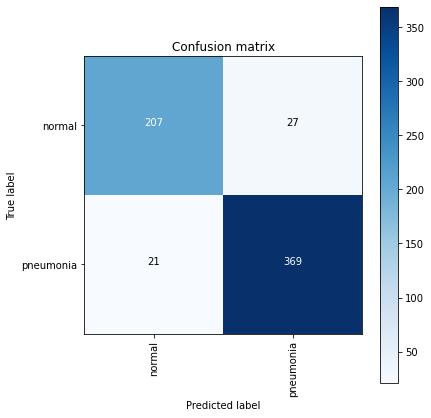

In [84]:
plot_results(history__new7, model_new7, test_images_100_arg, 0.5, test_y_arg_100_64)

In [69]:
model_new4 = models.Sequential()
model_new4.add(base_model_cnn)
model_new4.add(layers.Flatten())
model_new4.add(layers.Dense(1000, activation="relu", kernel_regularizer = l2(l2 = 0.01)))
model_new4.add(layers.Dropout(0.7))
model_new4.add(layers.Dense(1000, activation="relu", kernel_regularizer = l2(l2 = 0.01)))
model_new4.add(layers.Dropout(0.7))
model_new4.add(layers.Dense(300, activation="relu", kernel_regularizer = l2(l2 = 0.01)))
model_new4.add(layers.Dropout(0.6))
model_new4.add(layers.Dense(1,activation="sigmoid"))
model_new4.compile(
    loss='binary_crossentropy',
    optimizer="sgd",
    metrics=['accuracy'])

In [70]:
history__new4 = model_new4.fit_generator(train_generator_arg_100, 
                                steps_per_epoch=25, 
                                epochs=50, 
                                validation_data=val_generator_arg_100, 
                                validation_steps=25)

Epoch 1/50
25/25 [==============================] - 275s 11s/step - loss: 31.5840 - accuracy: 0.7456 - val_loss: 31.4033 - val_accuracy: 0.7700
Epoch 2/50
25/25 [==============================] - 274s 11s/step - loss: 31.2424 - accuracy: 0.7700 - val_loss: 31.0696 - val_accuracy: 0.7625
Epoch 3/50
25/25 [==============================] - 274s 11s/step - loss: 30.9147 - accuracy: 0.7619 - val_loss: 30.7443 - val_accuracy: 0.7663
Epoch 4/50
25/25 [==============================] - 274s 11s/step - loss: 30.5886 - accuracy: 0.7769 - val_loss: 30.4286 - val_accuracy: 0.7638
Epoch 5/50
25/25 [==============================] - 273s 11s/step - loss: 30.2818 - accuracy: 0.7638 - val_loss: 30.1188 - val_accuracy: 0.7663
Epoch 6/50
25/25 [==============================] - 268s 11s/step - loss: 29.9675 - accuracy: 0.7778 - val_loss: 29.8091 - val_accuracy: 0.7750
Epoch 7/50
25/25 [==============================] - 267s 11s/step - loss: 29.6871 - accuracy: 0.7487 - val_loss: 29.5105 - val_accuracy:

In [71]:
model_new4.evaluate(test_images_100_arg, test_y_arg_100_64)

20/20 [==============================] - 25s 1s/step - loss: 19.5511 - accuracy: 0.6250


[19.551143646240234, 0.625]

In [101]:
train_generator_arg_150, val_generator_arg_150, test_generator_arg_150 = process_data_aug((150,150), 32)

Found 4963 images belonging to 2 classes.
Found 875 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [106]:
base_model_cnn_250 = VGG16(
        weights='imagenet',
        include_top=False, 
        input_shape=(150,150,3))
base_model_cnn_250.trainable= False

In [107]:
model_new5 = models.Sequential()
model_new5.add(base_model_cnn_250)
model_new5.add(layers.Flatten())
model_new5.add(layers.Dense(1000, activation="relu", kernel_regularizer = l2(l2 = 0.01)))
model_new5.add(layers.Dropout(0.7))
model_new5.add(layers.Dense(100, activation="relu", kernel_regularizer = l2(l2 = 0.01)))
model_new5.add(layers.Dropout(0.7))
model_new5.add(layers.Dense(1,activation="sigmoid"))
model_new5.compile(
    loss='binary_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])

In [108]:
history__new5 = model_new5.fit_generator(train_generator_arg_150, 
                                steps_per_epoch=20, 
                                epochs=15, 
                                validation_data=val_generator_arg_150, 
                                validation_steps=20)

Epoch 1/15
20/20 [==============================] - 117s 6s/step - loss: 11.5381 - accuracy: 0.6531 - val_loss: 5.2885 - val_accuracy: 0.7609
Epoch 2/15
20/20 [==============================] - 123s 6s/step - loss: 4.4973 - accuracy: 0.7484 - val_loss: 3.5189 - val_accuracy: 0.7906
Epoch 3/15
20/20 [==============================] - 120s 6s/step - loss: 3.0821 - accuracy: 0.7219 - val_loss: 2.5931 - val_accuracy: 0.7500
Epoch 4/15
20/20 [==============================] - 121s 6s/step - loss: 2.2821 - accuracy: 0.7516 - val_loss: 1.9548 - val_accuracy: 0.7578
Epoch 5/15
20/20 [==============================] - 121s 6s/step - loss: 1.8093 - accuracy: 0.7891 - val_loss: 1.6133 - val_accuracy: 0.7578
Epoch 6/15
20/20 [==============================] - 121s 6s/step - loss: 1.5345 - accuracy: 0.7922 - val_loss: 1.3507 - val_accuracy: 0.7797
Epoch 7/15
20/20 [==============================] - 122s 6s/step - loss: 1.3452 - accuracy: 0.7969 - val_loss: 1.2059 - val_accuracy: 0.7969
Epoch 8/15
2

In [109]:
model_new5.evaluate(test_images_150_arg, test_y_arg_100_64)

20/20 [==============================] - 56s 3s/step - loss: 1.2422 - accuracy: 0.5593


[1.242220401763916, 0.5592948794364929]

In [76]:
test_images_150_arg, test_labels_150 = next(test_generator_arg_150)

In [266]:
model_CNN10 = models.Sequential()
model_CNN10.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(100 ,100, 3)))
model_CNN10.add(layers.MaxPooling2D((2, 2)))

model_CNN10.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_CNN10.add(layers.MaxPooling2D((2, 2)))

model_CNN10.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_CNN10.add(layers.MaxPooling2D((2, 2)))

model_CNN10.add(layers.Flatten())
model_CNN10.add(layers.Dropout(0.3))
model_CNN10.add(layers.Dense(64, activation='relu', kernel_regularizer = l2(l2 = 0.01)))
model_CNN10.add(layers.Dropout(0.3))
model_CNN10.add(layers.Dense(1, activation='sigmoid'))

model_CNN10.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate =1e-4),
              metrics=['accuracy'])

In [268]:
history_CNN10 = model_CNN10.fit_generator(train_generator_arg_100, 
                                steps_per_epoch=25, 
                                epochs=30, 
                                validation_data=val_generator_arg_100, 
                                validation_steps=25)

Epoch 1/30
25/25 [==============================] - 71s 3s/step - loss: 1.6448 - accuracy: 0.7556 - val_loss: 1.4937 - val_accuracy: 0.7750
Epoch 2/30
25/25 [==============================] - 70s 3s/step - loss: 1.4080 - accuracy: 0.7836 - val_loss: 1.3064 - val_accuracy: 0.7738
Epoch 3/30
25/25 [==============================] - 74s 3s/step - loss: 1.2541 - accuracy: 0.7719 - val_loss: 1.1601 - val_accuracy: 0.7663
Epoch 4/30
25/25 [==============================] - 77s 3s/step - loss: 1.1079 - accuracy: 0.7689 - val_loss: 0.9984 - val_accuracy: 0.7713
Epoch 5/30
25/25 [==============================] - 82s 3s/step - loss: 0.9866 - accuracy: 0.7763 - val_loss: 0.8873 - val_accuracy: 0.8050
Epoch 6/30
25/25 [==============================] - 87s 4s/step - loss: 0.9000 - accuracy: 0.7900 - val_loss: 1.0422 - val_accuracy: 0.6225
Epoch 7/30
25/25 [==============================] - 87s 3s/step - loss: 0.8463 - accuracy: 0.7861 - val_loss: 0.7493 - val_accuracy: 0.8687
Epoch 8/30
25/25 [==

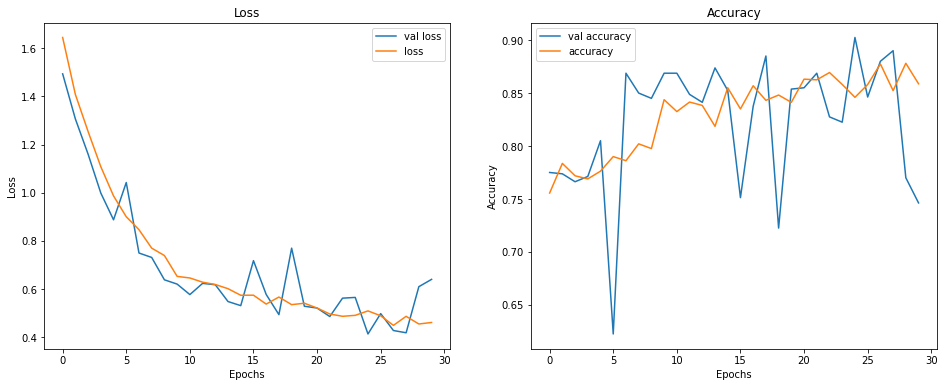

In [269]:
visualize_training_results(history_CNN10)

In [270]:
results_test = model_CNN10.evaluate(test_images_100_arg, test_y_arg_100_64)

20/20 [==============================] - 1s 55ms/step - loss: 0.5605 - accuracy: 0.7885


array([[0.25165218],
       [0.21024278],
       [0.3170744 ],
       [0.29324022],
       [0.14841297],
       [0.96229875],
       [0.61895597],
       [0.1537826 ],
       [0.63955975],
       [0.9757857 ],
       [0.08520836],
       [0.06829453],
       [0.669199  ],
       [0.14505115],
       [0.25763932],
       [0.9498421 ],
       [0.03432918],
       [0.8953238 ],
       [0.4324168 ],
       [0.30400854],
       [0.09210435],
       [0.87508744],
       [0.642733  ],
       [0.4112454 ],
       [0.5418936 ],
       [0.08687481],
       [0.9149757 ],
       [0.6456834 ],
       [0.04134974],
       [0.03868955],
       [0.04946902],
       [0.82874453],
       [0.7920152 ],
       [0.6630939 ],
       [0.05544117],
       [0.9644128 ],
       [0.08780432],
       [0.32530862],
       [0.81701815],
       [0.29613206],
       [0.08379552],
       [0.12319058],
       [0.7866361 ],
       [0.0180088 ],
       [0.99041104],
       [0.08888754],
       [0.3420239 ],
       [0.949

In [362]:
model_CNN10.predict(train_images_100_arg)

#plot_results(history_CNN10, model_CNN10, test_images_100_arg, 0.1, test_y_arg_100_64)


array([[0.8387755 ],
       [0.28454974],
       [0.06114131],
       [0.75044525],
       [0.6819978 ],
       [0.25907427],
       [0.9860399 ],
       [0.06078959],
       [0.04602051],
       [0.99230456],
       [0.5455454 ],
       [0.9192301 ],
       [0.11651006],
       [0.9680334 ],
       [0.69906837],
       [0.9711698 ],
       [0.32777807],
       [0.93327105],
       [0.9549966 ],
       [0.10861641],
       [0.6001138 ],
       [0.83772874],
       [0.5046682 ],
       [0.79539835],
       [0.87227666],
       [0.89060026],
       [0.9287306 ],
       [0.40275067],
       [0.39365968],
       [0.841135  ],
       [0.9464556 ],
       [0.9738311 ],
       [0.49169603],
       [0.2074942 ],
       [0.822774  ],
       [0.600708  ],
       [0.22160545],
       [0.9355413 ],
       [0.19021341],
       [0.44094422],
       [0.13319474],
       [0.36673534],
       [0.9724335 ],
       [0.9385914 ],
       [0.21715197],
       [0.86634374],
       [0.93848765],
       [0.883

### Image size 150x150

In [242]:
def process_data_aug(img_size, batch_size):
    # Data generation objects
    train_datagen = ImageDataGenerator(rescale=1./255, 
                                       rotation_range=40,
                                       zoom_range=0.1,
                                       width_shift_range=0.1, 
                                       height_shift_range=0.1,
                                       vertical_flip=True)
    test_val_datagen = ImageDataGenerator(rescale=1./255)
    
    # This is fed to the network in the specified batch sizes and image dimensions
    train_generator = train_datagen.flow_from_directory(
      directory=train_folder, 
      target_size=img_size, 
      batch_size=batch_size, 
      class_mode='binary', 
      shuffle=True)

    val_generator = test_val_datagen.flow_from_directory(
      directory=val_folder, 
      target_size=img_size, 
      batch_size=batch_size, 
      class_mode='binary', 
      shuffle=True)
    
    test_generator = test_val_datagen.flow_from_directory(
        test_folder, 
        target_size=img_size, 
        batch_size = test_img_number)  
    
    
    return train_generator, val_generator, test_generator

In [252]:
train_generator_arg_150, val_generator_arg_150, test_generator_arg_150 = process_data_aug((150,150), 64)

Found 4963 images belonging to 2 classes.
Found 875 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [245]:
train_images_150_arg, train_labels_150_arg = next(train_generator_arg_150)
test_images_150_arg, test_labels_150_arg = next(test_generator_arg_150)
val_images_150_arg, val_labels_150_arg = next(val_generator_arg_150)

In [248]:
model_CNN10 = models.Sequential()
model_CNN10.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150 ,150, 3)))
model_CNN10.add(layers.MaxPooling2D((2, 2)))

model_CNN10.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_CNN10.add(layers.MaxPooling2D((2, 2)))

model_CNN10.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_CNN10.add(layers.MaxPooling2D((2, 2)))

model_CNN10.add(layers.Flatten())
model_CNN10.add(layers.Dropout(0.3))
model_CNN10.add(layers.Dense(50, activation='relu', kernel_regularizer = l2(l2 = 0.01)))
model_CNN10.add(layers.Dropout(0.3))
model_CNN10.add(layers.Dense(1, activation='sigmoid'))

model_CNN10.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [253]:
history_CNN10 = model_CNN10.fit_generator(train_generator_arg_150, 
                                steps_per_epoch=25, 
                                epochs=20, 
                                validation_data=val_generator_arg_150, 
                                validation_steps=25)

Epoch 1/20
25/25 [==============================] - 88s 4s/step - loss: 0.3397 - accuracy: 0.8894 - val_loss: 0.2870 - val_accuracy: 0.9131
Epoch 2/20
25/25 [==============================] - 63s 2s/step - loss: 0.3244 - accuracy: 0.8988
Epoch 3/20
 1/25 [>.............................] - ETA: 1:08 - loss: 0.2379 - accuracy: 0.9531

KeyboardInterrupt: 

In [254]:
results_test = model_CNN10.evaluate(test_images_150_arg, test_y_arg_100_64)

20/20 [==============================] - 3s 128ms/step - loss: 1.7211 - accuracy: 0.5801


### Pretrained model

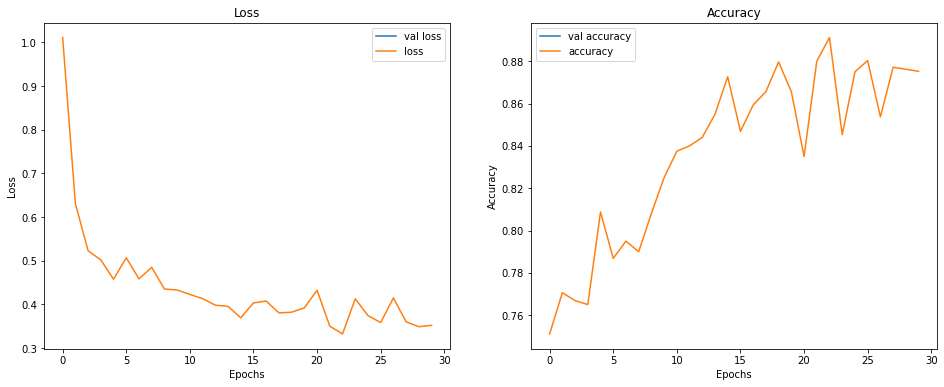

In [251]:
visualize_training_results(history_CNN10)

In [ ]:
shape_pretrained = (100,100,3)
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
base_model = VGG16(
        weights=None,
        include_top=False, 
        input_shape=shape_pretrained)

In [ ]:
train_generator_arg_150, val_generator_arg_150, test_generator_arg_150 = process_data_aug((150,150), 64)

##### argumented CNN 100 batch 32/16

In [221]:
# get all the data in the directory split/validation (200 images), and reshape them
val_generator_arg_100_16 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(100, 100),
        batch_size = 16,
        class_mode='binary')

# get all the data in the directory split/train (542 images), and reshape them
train_generator_arg_100_32 = train_datagen2.flow_from_directory(
        train_folder, target_size=(100, 100),
        batch_size = 32, class_mode='binary')


Found 875 images belonging to 2 classes.
Found 4963 images belonging to 2 classes.


In [222]:
model_CNN7 = models.Sequential()
model_CNN7.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(100 ,100, 3)))
model_CNN7.add(layers.MaxPooling2D((2, 2)))

model_CNN7.add(layers.Conv2D(32, (4, 4), activation='relu', kernel_regularizer = l2(l2 = 0.01)))
model_CNN7.add(layers.MaxPooling2D((2, 2)))

model_CNN7.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_CNN7.add(layers.MaxPooling2D((2, 2)))

model_CNN7.add(layers.Flatten())
model_CNN7.add(layers.Dense(50, activation='relu', kernel_regularizer = l2(l2 = 0.01)))
model_CNN7.add(layers.Dropout(0.3))
model_CNN7.add(layers.Dense(1, activation='sigmoid'))

model_CNN7.compile(loss='binary_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

In [223]:
history_CNN7 = model_CNN7.fit_generator(train_generator_arg_100_32, 
                                steps_per_epoch=25, 
                                epochs=20, 
                                validation_data=val_generator_arg_100_16, 
                                validation_steps=25)

Epoch 1/20
25/25 [==============================] - 31s 1s/step - loss: 1.2490 - accuracy: 0.7763 - val_loss: 0.8482 - val_accuracy: 0.7825
Epoch 2/20
25/25 [==============================] - 33s 1s/step - loss: 0.7353 - accuracy: 0.7825 - val_loss: 0.6701 - val_accuracy: 0.7675
Epoch 3/20
25/25 [==============================] - 35s 1s/step - loss: 0.6713 - accuracy: 0.7613 - val_loss: 0.6217 - val_accuracy: 0.7625
Epoch 4/20
25/25 [==============================] - 36s 1s/step - loss: 0.6222 - accuracy: 0.7638 - val_loss: 0.5949 - val_accuracy: 0.7700
Epoch 5/20
25/25 [==============================] - 36s 1s/step - loss: 0.5920 - accuracy: 0.7850 - val_loss: 0.6204 - val_accuracy: 0.7525
Epoch 6/20
25/25 [==============================] - 36s 1s/step - loss: 0.5924 - accuracy: 0.7738 - val_loss: 0.5799 - val_accuracy: 0.7525
Epoch 7/20
25/25 [==============================] - 35s 1s/step - loss: 0.5741 - accuracy: 0.7600 - val_loss: 0.5728 - val_accuracy: 0.7750
Epoch 8/20
25/25 [==

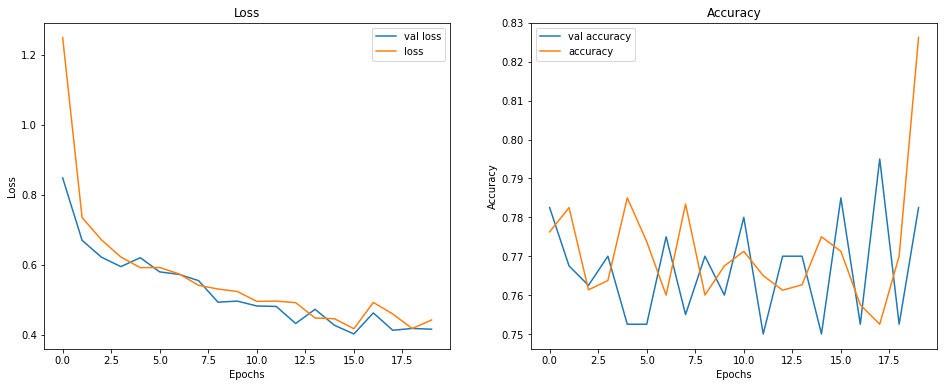

In [224]:
visualize_training_results(history_CNN7)

In [225]:
results_test = model_CNN7.evaluate(test_images_100_arg, test_y_arg_100_64)

20/20 [==============================] - 3s 110ms/step - loss: 0.5861 - accuracy: 0.6490


##### Argumented CNN 100 batch 32/16 - sgd

In [226]:
model_CNN8 = models.Sequential()
model_CNN8.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(100 ,100, 3)))
model_CNN8.add(layers.MaxPooling2D((2, 2)))

model_CNN8.add(layers.Conv2D(32, (4, 4), activation='relu', kernel_regularizer = l2(l2 = 0.01)))
model_CNN8.add(layers.MaxPooling2D((2, 2)))

model_CNN8.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_CNN8.add(layers.MaxPooling2D((2, 2)))

model_CNN8.add(layers.Flatten())
model_CNN8.add(layers.Dense(50, activation='relu', kernel_regularizer = l2(l2 = 0.01)))
model_CNN8.add(layers.Dropout(0.3))
model_CNN8.add(layers.Dense(1, activation='sigmoid'))

model_CNN8.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])

In [227]:
history_CNN8 = model_CNN8.fit_generator(train_generator_arg_100_32, 
                                steps_per_epoch=25, 
                                epochs=20, 
                                validation_data=val_generator_arg_100, 
                                validation_steps=25)

Epoch 1/20
25/25 [==============================] - 53s 2s/step - loss: 1.8991 - accuracy: 0.7775 - val_loss: 1.8633 - val_accuracy: 0.7638
Epoch 2/20
25/25 [==============================] - ETA: 0s - loss: 1.8476 - accuracy: 0.7725

KeyboardInterrupt: 

In [ ]:
visualize_training_results(history_CNN8)

In [ ]:
results_test = model_CNN8.evaluate(test_images_100_arg, test_y_arg_100_64)

### 250 resolution, argumented

In [166]:
train_datagen2 = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.1, 
                                   height_shift_range=0.1, 
                                   shear_range=0.2, 
                                   horizontal_flip=False)

In [167]:
test_generator3 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(250, 250), 
        batch_size = 64,
        class_mode='binary') 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator3 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(250, 250),
        batch_size = 32,
        class_mode='binary')

# get all the data in the directory split/train (542 images), and reshape them
train_generator3 = train_datagen2.flow_from_directory(train_folder, target_size=(250, 250), batch_size = 32, class_mode='binary')

        

Found 624 images belonging to 2 classes.
Found 875 images belonging to 2 classes.
Found 4963 images belonging to 2 classes.


In [175]:
train_images3, train_labels3 = next(train_generator3)
test_images3, test_labels3 = next(test_generator3)
val_images3, val_labels3 = next(val_generator3)

In [172]:
model_CNN5 = models.Sequential()
model_CNN5.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(250 ,250, 3)))
model_CNN5.add(layers.MaxPooling2D((2, 2)))

model_CNN5.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_CNN5.add(layers.MaxPooling2D((2, 2)))

model_CNN5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_CNN5.add(layers.MaxPooling2D((2, 2)))

model_CNN5.add(layers.Flatten())
model_CNN5.add(layers.Dense(30, activation='relu', kernel_regularizer = l2(l2 = 0.01)))
model_CNN5.add(layers.Dropout(0.3))
model_CNN5.add(layers.Dense(1, activation='sigmoid'))

model_CNN5.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [173]:
history_CNN5 = model_CNN5.fit_generator(train_generator3, 
                                steps_per_epoch=25, 
                                epochs=60, 
                                validation_data=val_generator3, 
                                validation_steps=25)

Epoch 1/60
25/25 [==============================] - 77s 3s/step - loss: 0.7755 - accuracy: 0.7663 - val_loss: 0.5485 - val_accuracy: 0.8225
Epoch 2/60
25/25 [==============================] - 74s 3s/step - loss: 0.5028 - accuracy: 0.7977 - val_loss: 0.5711 - val_accuracy: 0.7850
Epoch 3/60
25/25 [==============================] - 72s 3s/step - loss: 0.4835 - accuracy: 0.7964 - val_loss: 0.5398 - val_accuracy: 0.7738
Epoch 4/60
25/25 [==============================] - 74s 3s/step - loss: 0.5036 - accuracy: 0.7713 - val_loss: 0.4931 - val_accuracy: 0.7563
Epoch 5/60
25/25 [==============================] - 75s 3s/step - loss: 0.4349 - accuracy: 0.8250 - val_loss: 0.4680 - val_accuracy: 0.8575
Epoch 6/60
25/25 [==============================] - 73s 3s/step - loss: 0.4605 - accuracy: 0.8418 - val_loss: 0.5154 - val_accuracy: 0.8575
Epoch 7/60
25/25 [==============================] - 75s 3s/step - loss: 0.4665 - accuracy: 0.8000 - val_loss: 0.3617 - val_accuracy: 0.8788
Epoch 8/60
25/25 [==

25/25 [==============================] - 75s 3s/step - loss: 0.3010 - accuracy: 0.9013 - val_loss: 0.2990 - val_accuracy: 0.9175
Epoch 60/60
25/25 [==============================] - 73s 3s/step - loss: 0.2864 - accuracy: 0.8900 - val_loss: 0.2629 - val_accuracy: 0.9137


In [182]:
test_generator3 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(250, 250), 
        batch_size = 624,
        class_mode='binary') 
test_images3, test_labels3 = next(test_generator3)

results_test = model_CNN5.evaluate(test_images3, test_y3)

Found 624 images belonging to 2 classes.
20/20 [==============================] - 5s 227ms/step - loss: 1.7951 - accuracy: 0.4247


### CNN_3, shape 299 + dropout + regulization


In [125]:
# get all the data in the directory split/train, and reshape them
train_generator_299 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(299, 299), batch_size= train_img_number)

# get all the data in the directory split/validation, and reshape them
val_generator_299 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(299, 299), batch_size = val_img_number)

# get all the data in the directory split/test, and reshape them
test_generator_299 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(299, 299), batch_size = test_img_number) 

train_images3, train_labels3 = next(train_generator_299)
test_images3, test_labels3 = next(test_generator_299)
val_images3, val_labels3 = next(val_generator_299)

train_img3 = train_images3.reshape(train_images3.shape[0], -1)
test_img3 = test_images3.reshape(test_images3.shape[0], -1)
val_img3 = val_images3.reshape(val_images3.shape[0], -1)

print(train_img3.shape)
print(test_img3.shape)
print(val_img3.shape)



Found 4963 images belonging to 2 classes.
Found 875 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
(4963, 268203)
(624, 268203)
(875, 268203)


In [126]:
train_y3 = np.reshape(train_labels3[:,0], (train_img_number,1))
test_y3 = np.reshape(test_labels3[:,0], (test_img_number,1))
val_y3 = np.reshape(val_labels3[:,0], (val_img_number,1))

In [ ]:
from keras.applications.xception import Xception
cnn_base = Xception(weights='imagenet',  
                 input_shape=(299, 299, 3))



In [127]:
model_X = models.Sequential()
model_X.add(cnn_base)
model_X.add(layers.Flatten())
model_X.add(layers.Dense(128, activation='relu'))
model_X.add(layers.Dropout(0.4))
model_X.add(layers.Dense(1, activation='sigmoid'))
cnn_base.trainable = False


In [128]:
model_X.compile(loss='binary_crossentropy',
               optimizer="SGD",
               metrics=['accuracy'])


In [129]:
history_CNN5 = model_X.fit(train_images3,
                    train_y3,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images3, val_y3))

Epoch 1/30
156/156 [==============================] - 3786s 24s/step - loss: 0.6230 - accuracy: 0.7608 - val_loss: 0.5765 - val_accuracy: 0.7691
Epoch 2/30
156/156 [==============================] - 6901s 44s/step - loss: 0.5565 - accuracy: 0.7689 - val_loss: 0.5439 - val_accuracy: 0.7691
Epoch 3/30
156/156 [==============================] - 6791s 44s/step - loss: 0.5375 - accuracy: 0.7689 - val_loss: 0.5334 - val_accuracy: 0.7691
Epoch 4/30
156/156 [==============================] - ETA: 0s - loss: 0.5310 - accuracy: 0.7689 

KeyboardInterrupt: 

In [97]:
cnn_base.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

 block4_sepconv1_bn (BatchNorma  (None, 37, 37, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 37, 37, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 37, 37, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 37, 37, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 19, 19, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 19, 19, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 19, 19, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 19, 19, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_31 (Add)                   (None, 19, 19, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_30[0][0]']                 
                                                                                                  
 block10_sepconv1_act (Activati  (None, 19, 19, 728)  0          ['add_31[0][0]']                 
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 19, 19, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 19, 19, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 19, 19, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 19, 19, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_34 (A

In [104]:
results_test = history_CNN5.evaluate(test_images3, test_y3)

NameError: name 'history_CNN5' is not defined

### Data Augmentation

In [121]:
model_X2 = models.Sequential()
model_X2.add(cnn_base)
model_X2.add(layers.Flatten())
model_X2.add(layers.Dense(128, activation='relu'))
model_X2.add(layers.Dropout(0.4))
model_X2.add(layers.Dense(1, activation='sigmoid'))
cnn_base.trainable = False
model_X2.compile(loss='binary_crossentropy',
               optimizer="SGD",
               metrics=['accuracy'])


In [136]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=60, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.3, 
                                   zoom_range=0.1, 
                                   horizontal_flip=False)

In [137]:
test_generator2 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(299, 299), 
        batch_size = 64,
        class_mode='binary') 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator2 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(299, 299),
        batch_size = 32,
        class_mode='binary')

# get all the data in the directory split/train (542 images), and reshape them
train_generator2 = train_datagen.flow_from_directory(
        train_folder, 
        target_size=(299, 299), 
        batch_size = 32, 
        class_mode='binary')

Found 624 images belonging to 2 classes.
Found 875 images belonging to 2 classes.
Found 4963 images belonging to 2 classes.


In [124]:
history_X2 = model_X2.fit_generator(train_generator2, 
                                steps_per_epoch=25, 
                                epochs=30, 
                                validation_data=val_generator2, 
                                validation_steps=25)

Epoch 1/30
25/25 [==============================] - 301s 12s/step - loss: 0.6815 - accuracy: 0.7050 - val_loss: 0.6687 - val_accuracy: 0.7650
Epoch 2/30
25/25 [==============================] - 280s 11s/step - loss: 0.6592 - accuracy: 0.7575 - val_loss: 0.6483 - val_accuracy: 0.7688
Epoch 3/30
25/25 [==============================] - 267s 11s/step - loss: 0.6403 - accuracy: 0.7588 - val_loss: 0.6331 - val_accuracy: 0.7613
Epoch 4/30
25/25 [==============================] - 262s 11s/step - loss: 0.6230 - accuracy: 0.7665 - val_loss: 0.6186 - val_accuracy: 0.7625
Epoch 5/30
25/25 [==============================] - 265s 11s/step - loss: 0.6075 - accuracy: 0.7700 - val_loss: 0.6040 - val_accuracy: 0.7675
Epoch 6/30
25/25 [==============================] - 274s 11s/step - loss: 0.5944 - accuracy: 0.7700 - val_loss: 0.5942 - val_accuracy: 0.7650
Epoch 7/30
25/25 [==============================] - 288s 12s/step - loss: 0.5751 - accuracy: 0.7850 - val_loss: 0.5849 - val_accuracy: 0.7638
Epoch 

In [390]:
results_test = model_X2.evaluate(test_images3, test_y3)

20/20 [==============================] - 87s 4s/step - loss: 0.9762 - accuracy: 0.3750


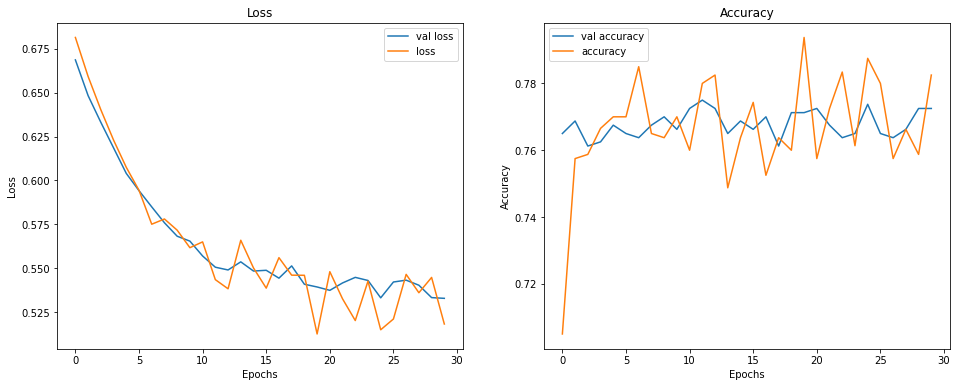

ValueError: in user code:

    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1751, in predict_step
        return self(x, training=False)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_19" is incompatible with the layer: expected shape=(None, 299, 299, 3), found shape=(None, 250, 250, 3)


In [384]:
plot_results(history_X2, model_X2, test_images3, 0.5, test_y3)


# Conclusion
---
For our finalized model we used LinearRegression because of the following reasons: 
1) It is easy to interprete.

2) It have good recall compared to the other models, without much sacrifice in precision. 


Overall, this data tells us that injuries during car crashes can be predicted and we can see tha major factors that influence it. These modeling results correspond to our observations during data exploration phase